***Analysis of Weather Data in Mumbai City using Data Science for Trend and Prediction***

**DESKRIPSI DATA**

In [37]:
#Retrieving the data
#Import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Reading the CSV file
file_path = 'mumbai.csv'
data = pd.read_csv(file_path)

# Displaying the structure, first 5 rows, column names, and information of the new dataset
print(data.head())
print(data.columns)
print(data.info())

# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'sunHour', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']]

print(weather_data.head())
# Extra Keys Consideration for Data Preperation before Data Exploration
# Re-running outlier detection excluding the 'date_time' column
numerical_columns = ['maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'sunHour', 'DewPointC', 'FeelsLikeC']

Q1 = weather_data[numerical_columns].quantile(0.25)
Q3 = weather_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding rows with outliers
outliers = weather_data[(weather_data[numerical_columns] < lower_bound) | (weather_data[numerical_columns] > upper_bound)].count()

null = weather_data[(weather_data[numerical_columns] < lower_bound) | (weather_data[numerical_columns] > upper_bound)].dropna()
# Checking for missing values again
missing_values = weather_data.isnull().sum()

missing_values, null, outliers

             date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2009-01-01 00:00:00        30        22           0.0     11.0        7   
1  2009-01-01 01:00:00        30        22           0.0     11.0        7   
2  2009-01-01 02:00:00        30        22           0.0     11.0        7   
3  2009-01-01 03:00:00        30        22           0.0     11.0        7   
4  2009-01-01 04:00:00        30        22           0.0     11.0        7   

   uvIndex.1  moon_illumination  moonrise   moonset  ... WindChillC  \
0          1                 31  10:21 AM  10:20 PM  ...         27   
1          1                 31  10:21 AM  10:20 PM  ...         26   
2          1                 31  10:21 AM  10:20 PM  ...         26   
3          1                 31  10:21 AM  10:20 PM  ...         25   
4          1                 31  10:21 AM  10:20 PM  ...         26   

  WindGustKmph  cloudcover  humidity  precipMM  pressure  tempC  visibility  \
0           11           

(date_time        0
 maxtempC         0
 mintempC         0
 humidity         0
 precipMM         0
 tempC            0
 windspeedKmph    0
 uvIndex          0
 sunHour          0
 DewPointC        0
 FeelsLikeC       0
 HeatIndexC       0
 dtype: int64,
 Empty DataFrame
 Columns: [date_time, maxtempC, mintempC, humidity, precipMM, tempC, windspeedKmph, uvIndex, sunHour, DewPointC, FeelsLikeC, HeatIndexC]
 Index: [],
 date_time            0
 maxtempC           336
 mintempC             0
 humidity             0
 precipMM         13857
 tempC             4076
 windspeedKmph     2742
 uvIndex              0
 sunHour          16536
 DewPointC          357
 FeelsLikeC        3266
 HeatIndexC           0
 dtype: int64)

**DATA RETRIEVING**

In [38]:
#Retrieving the data
#Import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Reading the CSV file
file_path = 'mumbai.csv'
data = pd.read_csv(file_path)

# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'sunHour', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']]

print(weather_data.head())

             date_time  maxtempC  mintempC  humidity  precipMM  tempC  \
0  2009-01-01 00:00:00        30        22        49       0.0     22   
1  2009-01-01 01:00:00        30        22        50       0.0     22   
2  2009-01-01 02:00:00        30        22        50       0.0     22   
3  2009-01-01 03:00:00        30        22        50       0.0     22   
4  2009-01-01 04:00:00        30        22        49       0.0     22   

   windspeedKmph  uvIndex  sunHour  DewPointC  FeelsLikeC  HeatIndexC  
0             10        7     11.0         15          28          28  
1             11        7     11.0         15          27          27  
2             12        7     11.0         15          27          27  
3             13        7     11.0         14          25          26  
4             12        7     11.0         14          26          26  


**DATA PREPARATION**

In [39]:
#Data Preparation
# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'cloudcover', 'sunHour', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']]

# Convert 'date_time' to datetime format (removing timezone awareness if it exists)
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)

# Ensure comparison dates are timezone-naive (you can adjust the date range based on the dataset)
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2020-01-01')

# Filtering data between the start and end dates
filtered_data = weather_data[(weather_data['date_time'] >= start_date) &
                             (weather_data['date_time'] <= end_date)]

# Set 'date_time' as the index
filtered_data.set_index('date_time', inplace=True)

# Finding the maximum and minimum values without resampling
temp_max = filtered_data['maxtempC'].max()
temp_min = filtered_data['mintempC'].min()

humidity_max = filtered_data['humidity'].max()
humidity_min = filtered_data['humidity'].min()

wind_max = filtered_data['windspeedKmph'].max()
wind_min = filtered_data['windspeedKmph'].min()

# Extracting the corresponding dates for max and min values
temp_max_date = filtered_data[filtered_data['maxtempC'] == temp_max].index[0]
temp_min_date = filtered_data[filtered_data['mintempC'] == temp_min].index[0]

humidity_max_date = filtered_data[filtered_data['humidity'] == humidity_max].index[0]
humidity_min_date = filtered_data[filtered_data['humidity'] == humidity_min].index[0]

wind_max_date = filtered_data[filtered_data['windspeedKmph'] == wind_max].index[0]
wind_min_date = filtered_data[filtered_data['windspeedKmph'] == wind_min].index[0]

# Calculating monthly averages
monthly_avg = filtered_data.resample('M').mean()

# Resample into weekly averages
weekly_avg = filtered_data.resample('W').mean()

# Calculating the monthly trend based on weekly averages
monthly_trend = weekly_avg.resample('M').mean()

# Calculating rolling averages for Temperature, Humidity, and Wind Speed on weekly data
weekly_avg['Temp_Rolling_Avg'] = weekly_avg['tempC'].rolling(window=30).mean()
weekly_avg['Humidity_Rolling_Avg'] = weekly_avg['humidity'].rolling(window=30).mean()
weekly_avg['Wind_Rolling_Avg'] = weekly_avg['windspeedKmph'].rolling(window=30).mean()

# Extra Keys Consideration for Data Preperation before Data Exploration
# Re-running outlier detection excluding the 'date_time' column
numerical_columns = ['maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'cloudcover', 'uvIndex', 'sunHour', 'DewPointC', 'FeelsLikeC']

Q1 = weather_data[numerical_columns].quantile(0.25)
Q3 = weather_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding rows with outliers
outliers = weather_data[(weather_data[numerical_columns] < lower_bound) | (weather_data[numerical_columns] > upper_bound)].count()
# Checking for missing values again
missing_values = weather_data.isnull().sum()

missing_values, outliers

#No Usage of Unbalanced Data because most of our data consists of numerical which uses Outliers instead


C:\Users\andre\AppData\Local\Temp\ipykernel_10256\2519337753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)
C:\Users\andre\AppData\Local\Temp\ipykernel_10256\2519337753.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = filtered_data.resample('M').mean()
C:\Users\andre\AppData\Local\Temp\ipykernel_10256\2519337753.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = weekly_avg.resample('M').mean()


(date_time        0
 maxtempC         0
 mintempC         0
 humidity         0
 precipMM         0
 tempC            0
 windspeedKmph    0
 uvIndex          0
 cloudcover       0
 sunHour          0
 DewPointC        0
 FeelsLikeC       0
 HeatIndexC       0
 dtype: int64,
 date_time            0
 maxtempC           336
 mintempC             0
 humidity             0
 precipMM         13857
 tempC             4076
 windspeedKmph     2742
 uvIndex              0
 cloudcover           0
 sunHour          16536
 DewPointC          357
 FeelsLikeC        3266
 HeatIndexC           0
 dtype: int64)

**Ground Truth Data #1**

C:\Users\andre\AppData\Local\Temp\ipykernel_10256\519786282.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data_2012 = filtered_data_2012.resample('M').agg({'maxtempC': 'max', 'mintempC': 'min', 'tempC': 'mean'})


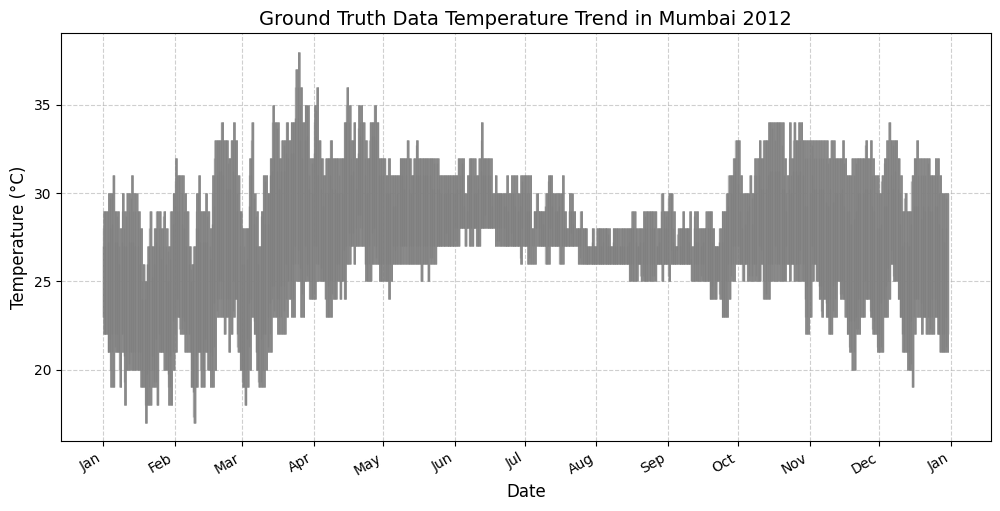

In [40]:
# Ground Truth Data for Temperature Mumbai in the year 2012
# Filter the data for the year 2012 only
start_date_2012 = pd.to_datetime('2012-01-01')
end_date_2012 = pd.to_datetime('2012-12-31')

filtered_data_2012 = filtered_data[(filtered_data.index >= start_date_2012) &
                                   (filtered_data.index <= end_date_2012)]

# Resampling the data to get monthly average, maximum, and minimum temperatures for 2012
monthly_data_2012 = filtered_data_2012.resample('M').agg({'maxtempC': 'max', 'mintempC': 'min', 'tempC': 'mean'})

# Define the x-axis as the months in 2012
x_values_2012 = monthly_data_2012.index

# Extract the y-values for the maximum, minimum, and average temperatures in 2012
y_max_2012 = monthly_data_2012['maxtempC']
y_min_2012 = monthly_data_2012['mintempC']
y_avg_2012 = monthly_data_2012['tempC']

# Resample data to daily highs, lows, and averages
daily_max = filtered_data_2012['maxtempC']
daily_min = filtered_data_2012['mintempC']
daily_avg_high = daily_max.rolling(window=7, min_periods=1).mean()  # Smoothed high temp (7-day window)
daily_avg_low = daily_min.rolling(window=7, min_periods=1).mean()   # Smoothed low temp (7-day window)

# Calculate percentiles for each day in 2012
percentile_25 = filtered_data_2012['tempC'].resample('D').apply(lambda x: np.percentile(x, 25))
percentile_75 = filtered_data_2012['tempC'].resample('D').apply(lambda x: np.percentile(x, 75))
percentile_10 = filtered_data_2012['tempC'].resample('D').apply(lambda x: np.percentile(x, 10))
percentile_90 = filtered_data_2012['tempC'].resample('D').apply(lambda x: np.percentile(x, 90))

# Ensure the index alignment
percentile_10 = percentile_10.reindex(daily_max.index)
percentile_90 = percentile_90.reindex(daily_max.index)
percentile_25 = percentile_25.reindex(daily_max.index)
percentile_75 = percentile_75.reindex(daily_max.index)

plt.figure(figsize=(12, 6))

# Plot the 10th to 90th percentile (gray shading)
plt.fill_between(
    daily_max.index,
    percentile_10,
    percentile_90,
    color='gray',
    alpha=0.5,
    label='10th-90th Percentile'
)

# Plot the 25th to 75th percentile (darker gray shading)
plt.fill_between(
    daily_max.index,
    percentile_25,
    percentile_75,
    color='gray',
    alpha=0.8,
    label='25th-75th Percentile'
)

# Add daily range (thin vertical bars in gray)
plt.vlines(
    daily_max.index,
    daily_min,
    daily_max,
    color='gray',
    alpha=0.3,
    linewidth=0.5
)

# Adding labels and title
plt.title('Ground Truth Data Temperature Trend in Mumbai 2012', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Formatting the x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()




**Ground Truth Data #2**

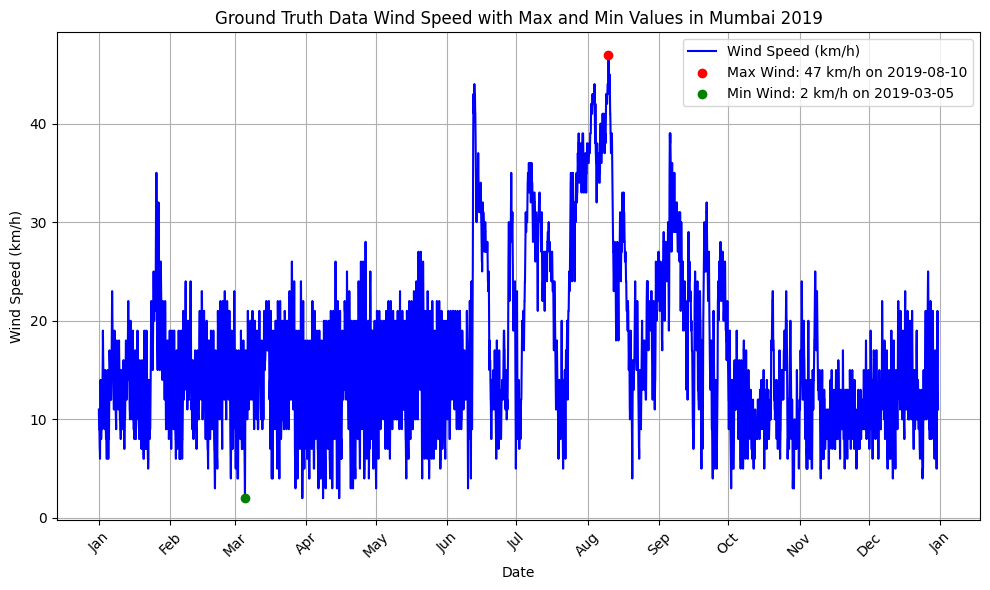

In [41]:
# Ground Truth Data for Wind Speed Mumbai Data in the year 2019
# Filtering for 2019
start_date_2019 = pd.to_datetime('2019-01-01')
end_date_2019 = pd.to_datetime('2019-12-31')
filtered_data_2019 = filtered_data[(filtered_data.index >= start_date_2019) & (filtered_data.index <= end_date_2019)]

# Find max and min wind speed values
max_wind = filtered_data_2019['windspeedKmph'].max()
min_wind = filtered_data_2019['windspeedKmph'].min()

# Extract corresponding dates for the max and min wind speed
max_wind_date = filtered_data_2019[filtered_data_2019['windspeedKmph'] == max_wind].index[0]
min_wind_date = filtered_data_2019[filtered_data_2019['windspeedKmph'] == min_wind].index[0]

# Plotting with month-based x-axis and max/min points
plt.figure(figsize=(10, 6))
plt.plot(filtered_data_2019.index, filtered_data_2019['windspeedKmph'], label='Wind Speed (km/h)', color='blue')

# Marking max and min points with full date in labels
plt.scatter(max_wind_date, max_wind, color='red', label=f'Max Wind: {max_wind} km/h on {max_wind_date.date()}', zorder=5)
plt.scatter(min_wind_date, min_wind, color='green', label=f'Min Wind: {min_wind} km/h on {min_wind_date.date()}', zorder=5)

# Formatting the plot
plt.title('Ground Truth Data Wind Speed with Max and Min Values in Mumbai 2019')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()

# Set x-axis to show months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Data Exploration**

Weekly Average and Monthly Trend in Mumbai (2009 - 2019)

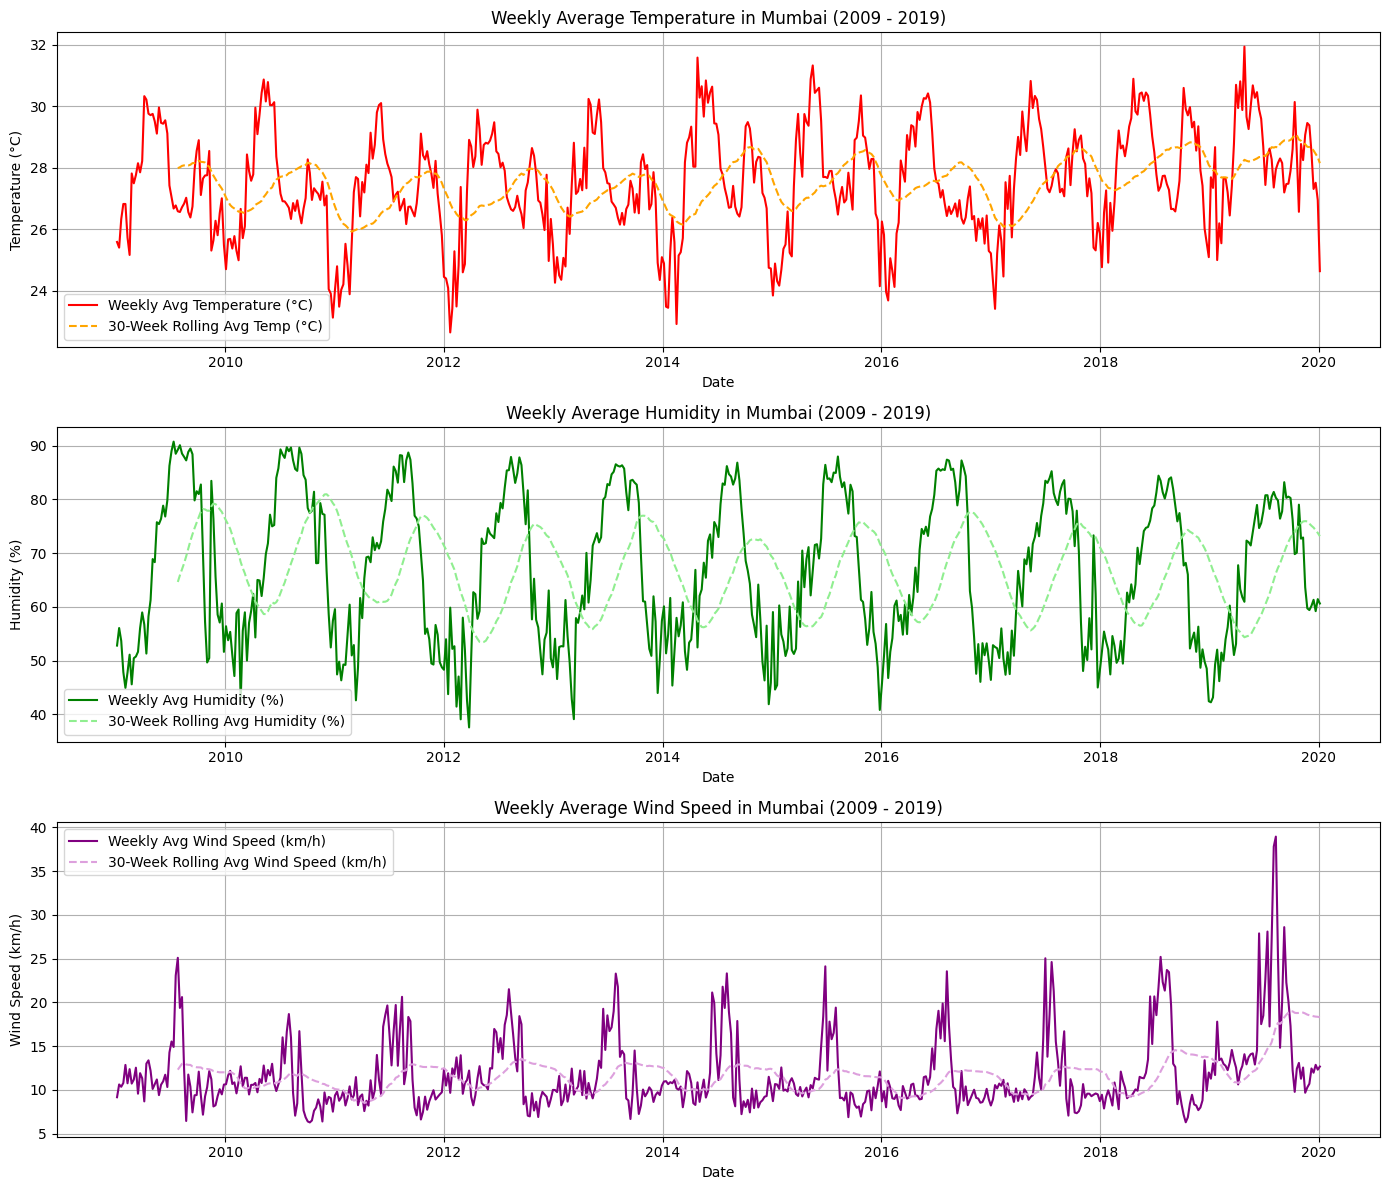

In [42]:
#Data Exploration
#Weekly Average and Monthly Trend in Mumbai (2009 - 2019)
# Plot weekly averages and rolling averages with resampled weekly datas
plt.figure(figsize=(14, 12))

# Weekly Temperature and Rolling Average
plt.subplot(3, 1, 1)
plt.plot(weekly_avg.index, weekly_avg['tempC'], label='Weekly Avg Temperature (°C)', color='red')
plt.plot(weekly_avg.index, weekly_avg['Temp_Rolling_Avg'], label='30-Week Rolling Avg Temp (°C)', color='orange', linestyle='--')
plt.title('Weekly Average Temperature in Mumbai (2009 - 2019)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Weekly Humidity and Rolling Average
plt.subplot(3, 1, 2)
plt.plot(weekly_avg.index, weekly_avg['humidity'], label='Weekly Avg Humidity (%)', color='green')
plt.plot(weekly_avg.index, weekly_avg['Humidity_Rolling_Avg'], label='30-Week Rolling Avg Humidity (%)', color='lightgreen', linestyle='--')
plt.title('Weekly Average Humidity in Mumbai (2009 - 2019)')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)

# Weekly Wind Speed and Rolling Average
plt.subplot(3, 1, 3)
plt.plot(weekly_avg.index, weekly_avg['windspeedKmph'], label='Weekly Avg Wind Speed (km/h)', color='purple')
plt.plot(weekly_avg.index, weekly_avg['Wind_Rolling_Avg'], label='30-Week Rolling Avg Wind Speed (km/h)', color='plum', linestyle='--')
plt.title('Weekly Average Wind Speed in Mumbai (2009 - 2019)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Raw Data without Aggregating 2009-2019

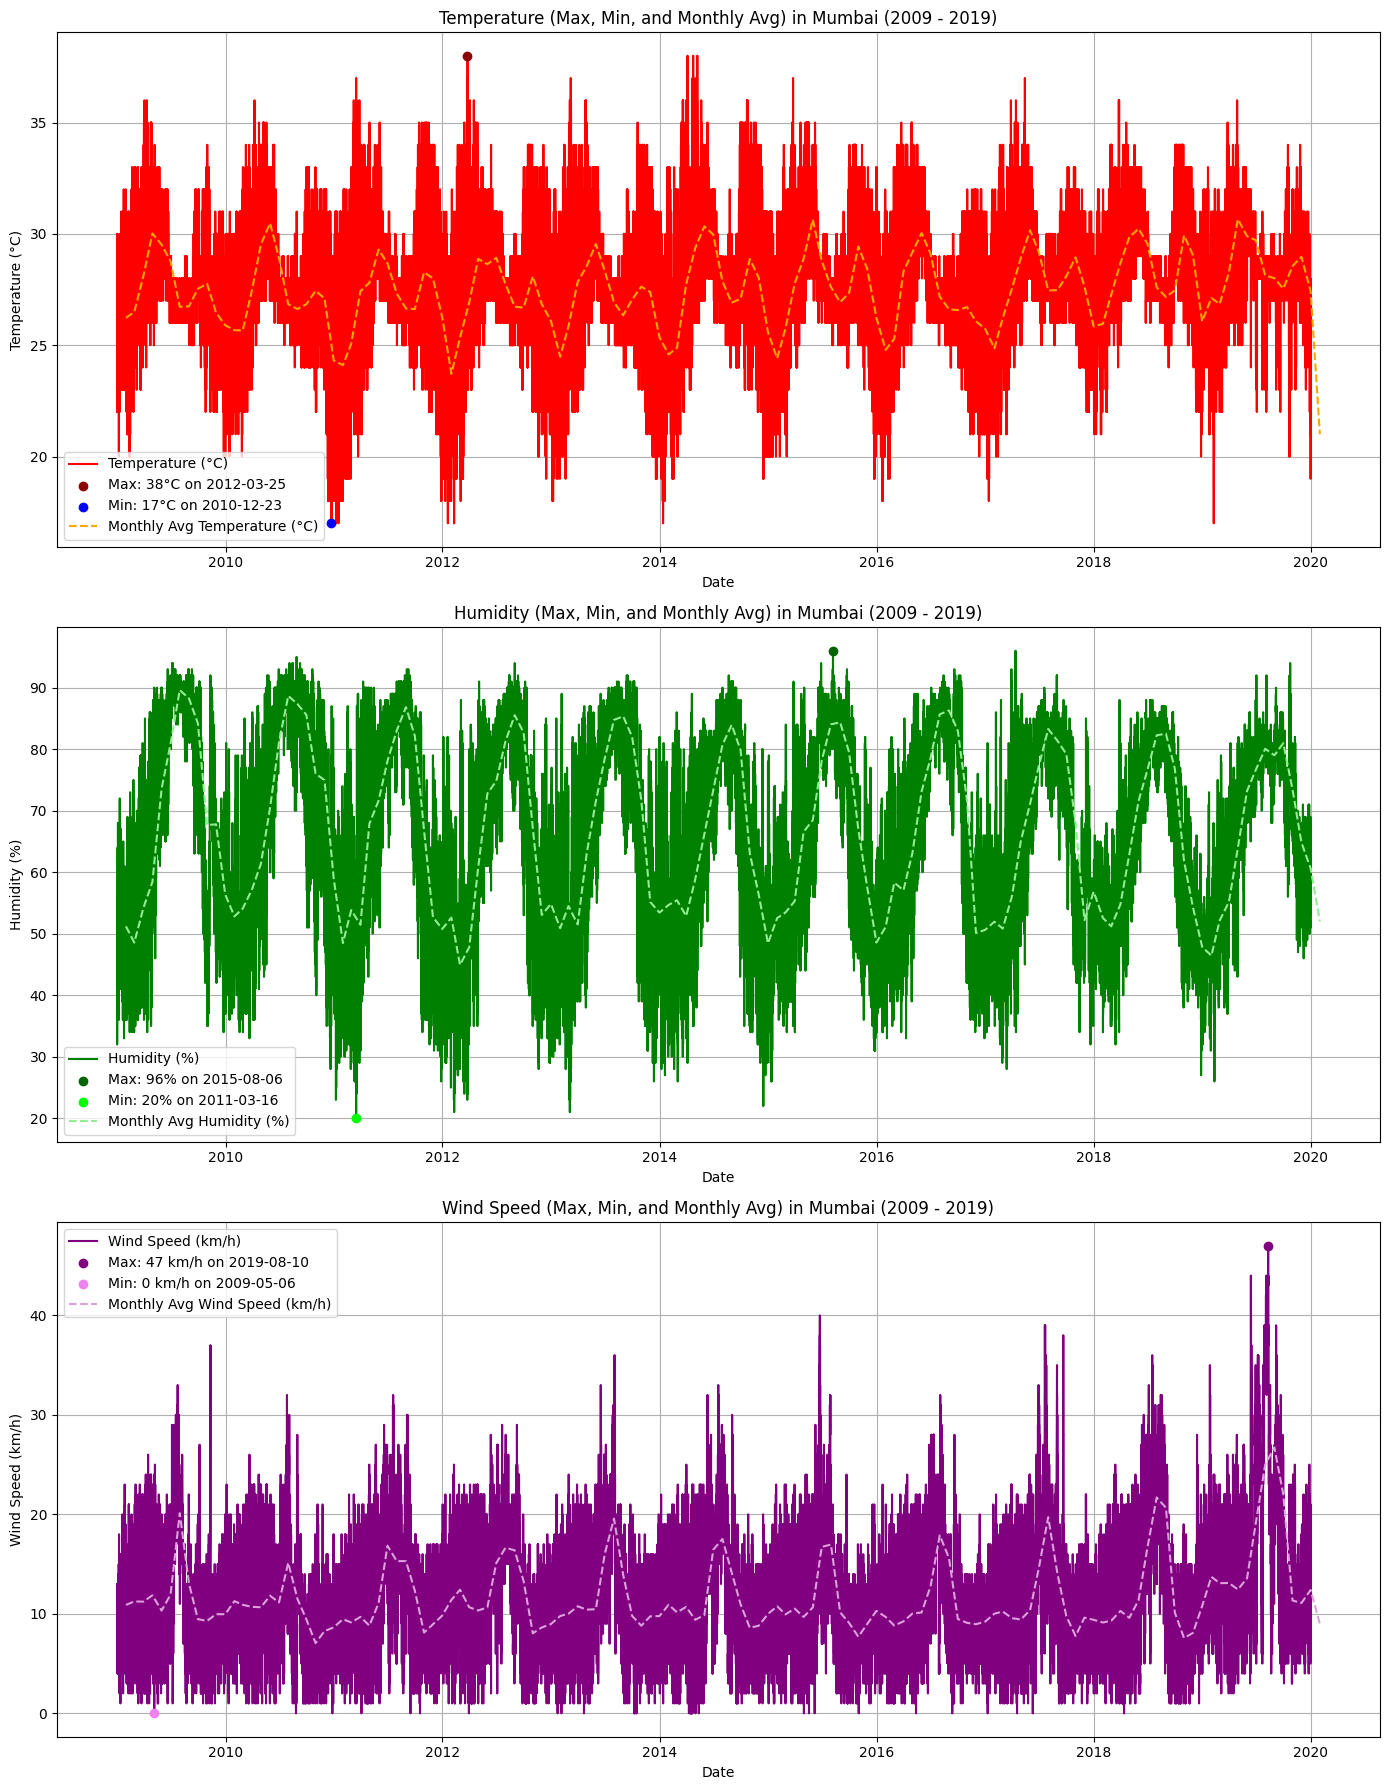

In [43]:
# Raw Data without Resampling 2009-2019
# Plotting the Maximum, Minimum, and Monthly Average Data
plt.figure(figsize=(14, 18))

# Max temp, min temp, and monthly avg tempC
plt.subplot(3, 1, 1)
plt.plot(filtered_data.index, filtered_data['tempC'], label='Temperature (°C)', color='red')
plt.scatter(temp_max_date, temp_max, color='darkred', label=f'Max: {temp_max}°C on {temp_max_date.date()}', zorder=5)
plt.scatter(temp_min_date, temp_min, color='blue', label=f'Min: {temp_min}°C on {temp_min_date.date()}', zorder=5)
plt.plot(monthly_avg.index, monthly_avg['tempC'], label='Monthly Avg Temperature (°C)', color='orange', linestyle='--')
plt.title('Temperature (Max, Min, and Monthly Avg) in Mumbai (2009 - 2019)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Humidity max, min, and monthly avg
plt.subplot(3, 1, 2)
plt.plot(filtered_data.index, filtered_data['humidity'], label='Humidity (%)', color='green')
plt.scatter(humidity_max_date, humidity_max, color='darkgreen', label=f'Max: {humidity_max}% on {humidity_max_date.date()}', zorder=5)
plt.scatter(humidity_min_date, humidity_min, color='lime', label=f'Min: {humidity_min}% on {humidity_min_date.date()}', zorder=5)
plt.plot(monthly_avg.index, monthly_avg['humidity'], label='Monthly Avg Humidity (%)', color='lightgreen', linestyle='--')
plt.title('Humidity (Max, Min, and Monthly Avg) in Mumbai (2009 - 2019)')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)

# Wind Speed max, min, and monthly avg
plt.subplot(3, 1, 3)
plt.plot(filtered_data.index, filtered_data['windspeedKmph'], label='Wind Speed (km/h)', color='purple')
plt.scatter(wind_max_date, wind_max, color='purple', label=f'Max: {wind_max} km/h on {wind_max_date.date()}', zorder=5)
plt.scatter(wind_min_date, wind_min, color='violet', label=f'Min: {wind_min} km/h on {wind_min_date.date()}', zorder=5)
plt.plot(monthly_avg.index, monthly_avg['windspeedKmph'], label='Monthly Avg Wind Speed (km/h)', color='plum', linestyle='--')
plt.title('Wind Speed (Max, Min, and Monthly Avg) in Mumbai (2009 - 2019)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Implementation data into Arrays

In [44]:
#ARRAYS
# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'cloudcover', 'sunHour', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']]

# Convert 'date_time' to datetime format (removing timezone awareness if it exists)
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)

# Ensure comparison dates are timezone-naive (you can adjust the date range based on the dataset)
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2020-01-01')

# Filtering data between the start and end dates
filtered_data = weather_data[(weather_data['date_time'] >= start_date) &
                             (weather_data['date_time'] <= end_date)]

# Set 'date_time' as the index
filtered_data.set_index('date_time', inplace=True)

#Resample Data menjadi Weekly
resampled_data = filtered_data.resample('W').mean()  # Resampling Weekly

#ARRAYS
#Creating arrays for selected weather data
#Struktur Arraynya adalah Vector
max_temp_data = np.array(resampled_data['maxtempC'])  # Max temperature
min_temp_data = np.array(resampled_data['mintempC'])  # Min temperature
humidity_data = np.array(resampled_data['humidity'])  # Humidity
temp_data = np.array(resampled_data['tempC'])  # Average temperature
wind_speed_data = np.array(resampled_data['windspeedKmph'])  # Wind speed

# Array dimensions, shape, size, and data type
print("Temp Dimensions:", temp_data.ndim)  # Dimension
print("Temp Shape:", temp_data.shape)  # Shape (number of elements)
print("Temp Size:", temp_data.size)  # Total number of elements
print("Temp Data Type:", temp_data.dtype)  # Data type of elements

# Group the data by year and select the first entry of each year (Indexing)
first_data_per_year = resampled_data.groupby(resampled_data.index.year).first()

# Create arrays untuk index pertama dari setiap tahun
first_max_temp_data = np.array(first_data_per_year['maxtempC'])  # Max temperature
first_min_temp_data = np.array(first_data_per_year['mintempC'])  # Min temperature
first_humidity_data = np.array(first_data_per_year['humidity'])  # Humidity
first_temp_data = np.array(first_data_per_year['tempC'])  # Average temperature
first_wind_speed_data = np.array(first_data_per_year['windspeedKmph'])  # Wind speed

# Print the first data for each year from 2009 to 2020
years = first_data_per_year.index
for i, year in enumerate(years):
    print(f"Year: {year}")
    print(f"  Max Temp: {first_max_temp_data[i]} °C")
    print(f"  Min Temp: {first_min_temp_data[i]} °C")
    print(f"  Avg Temp: {first_temp_data[i]} °C")
    print(f"  Humidity: {first_humidity_data[i]} %")
    print(f"  Wind Speed: {first_wind_speed_data[i]} km/h")


# Slicing: Extract the first 4 weeks of temperature
first_4_weeks_temp = temp_data[:4]
print("First 4 weeks Temp:", first_4_weeks_temp)

Temp Dimensions: 1
Temp Shape: (575,)
Temp Size: 575
Temp Data Type: float64
Year: 2009
  Max Temp: 29.5 °C
  Min Temp: 22.5 °C
  Avg Temp: 25.583333333333332 °C
  Humidity: 52.8125 %
  Wind Speed: 9.166666666666666 km/h
Year: 2010
  Max Temp: 28.285714285714285 °C
  Min Temp: 21.714285714285715 °C
  Avg Temp: 24.696428571428573 °C
  Humidity: 56.404761904761905 %
  Wind Speed: 10.648809523809524 km/h
Year: 2011
  Max Temp: 28.428571428571427 °C
  Min Temp: 20.142857142857142 °C
  Avg Temp: 24.029761904761905 °C
  Humidity: 59.583333333333336 %
  Wind Speed: 9.369047619047619 km/h
Year: 2012
  Max Temp: 29.571428571428573 °C
  Min Temp: 19.714285714285715 °C
  Avg Temp: 24.446428571428573 °C
  Humidity: 48.31547619047619 %
  Wind Speed: 12.31547619047619 km/h
Year: 2013
  Max Temp: 29.0 °C
  Min Temp: 20.571428571428573 °C
  Avg Temp: 24.25595238095238 °C
  Humidity: 54.083333333333336 %
  Wind Speed: 9.988095238095237 km/h
Year: 2014
  Max Temp: 29.428571428571427 °C
  Min Temp: 21.71

C:\Users\andre\AppData\Local\Temp\ipykernel_10256\3174919075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)


Arrays operations and functions

In [45]:
#ARRAY OPEARTIONS
# Broadcasting Operation: Calculate the temperature range
temperature_range = max_temp_data - min_temp_data

# Array Functions Results
max_temp = np.max(max_temp_data)
min_temp = np.min(min_temp_data)
avg_temp = np.mean(temp_data)

max_humidity = np.max(humidity_data)
min_humidity = np.min(humidity_data)
avg_humidity = np.mean(humidity_data)

max_windspeed = np.max(wind_speed_data)
min_windspeed = np.min(wind_speed_data)
avg_windspeed = np.mean(wind_speed_data)

# Print results
print(f"Max Temperature: {max_temp} °C")
print(f"Min Temperature: {min_temp} °C")
print(f"Average Temperature: {avg_temp:.2f} °C")

print(f"Max Humidity: {max_humidity} %")
print(f"Min Humidity: {min_humidity} %")
print(f"Average Humidity: {avg_humidity:.2f} %")

print(f"Max Wind Speed: {max_windspeed} km/h")
print(f"Min Wind Speed: {min_windspeed} km/h")
print(f"Average Wind Speed: {avg_windspeed:.2f} km/h")

# Maximum Temperature Index
index_max_temp = np.argmax(max_temp_data)
print(f"Max Temp Index: {index_max_temp} (Temperature: {max_temp_data[index_max_temp]} °C)")
# Minimum Temperature Index
index_min_temp = np.argmin(min_temp_data)
print(f"Min Temp Index: {index_min_temp} (Temperature: {min_temp_data[index_min_temp]} °C)")
# Maximum Humidity Index
index_max_humidity = np.argmax(humidity_data)
print(f"Max Humidity Index: {index_max_humidity} (Humidity: {humidity_data[index_max_humidity]} %)")
# Minimum Humidity Index
index_min_humidity = np.argmin(humidity_data)
print(f"Min Humidity Index: {index_min_humidity} (Humidity: {humidity_data[index_min_humidity]} %)")
# Maximum Wind Speed Index
index_max_windspeed = np.argmax(wind_speed_data)
print(f"Max Wind Speed Index: {index_max_windspeed} (Wind Speed: {wind_speed_data[index_max_windspeed]} km/h)")
# Minimum Wind Speed Index
index_min_windspeed = np.argmin(wind_speed_data)
print(f"Min Wind Speed Index: {index_min_windspeed} (Wind Speed: {wind_speed_data[index_min_windspeed]} km/h)")

Max Temperature: 36.42857142857143 °C
Min Temperature: 17.632653061224488 °C
Average Temperature: 27.53 °C
Max Humidity: 90.72619047619048 %
Min Humidity: 37.595238095238095 %
Average Humidity: 66.69 %
Max Wind Speed: 38.95238095238095 km/h
Min Wind Speed: 6.285714285714286 km/h
Average Wind Speed: 11.80 km/h
Max Temp Index: 277 (Temperature: 36.42857142857143 °C)
Min Temp Index: 574 (Temperature: 17.632653061224488 °C)
Max Humidity Index: 27 (Humidity: 90.72619047619048 %)
Min Humidity Index: 168 (Humidity: 37.595238095238095 %)
Max Wind Speed Index: 553 (Wind Speed: 38.95238095238095 km/h)
Min Wind Speed Index: 92 (Wind Speed: 6.285714285714286 km/h)


Data visualisation using array and numpy

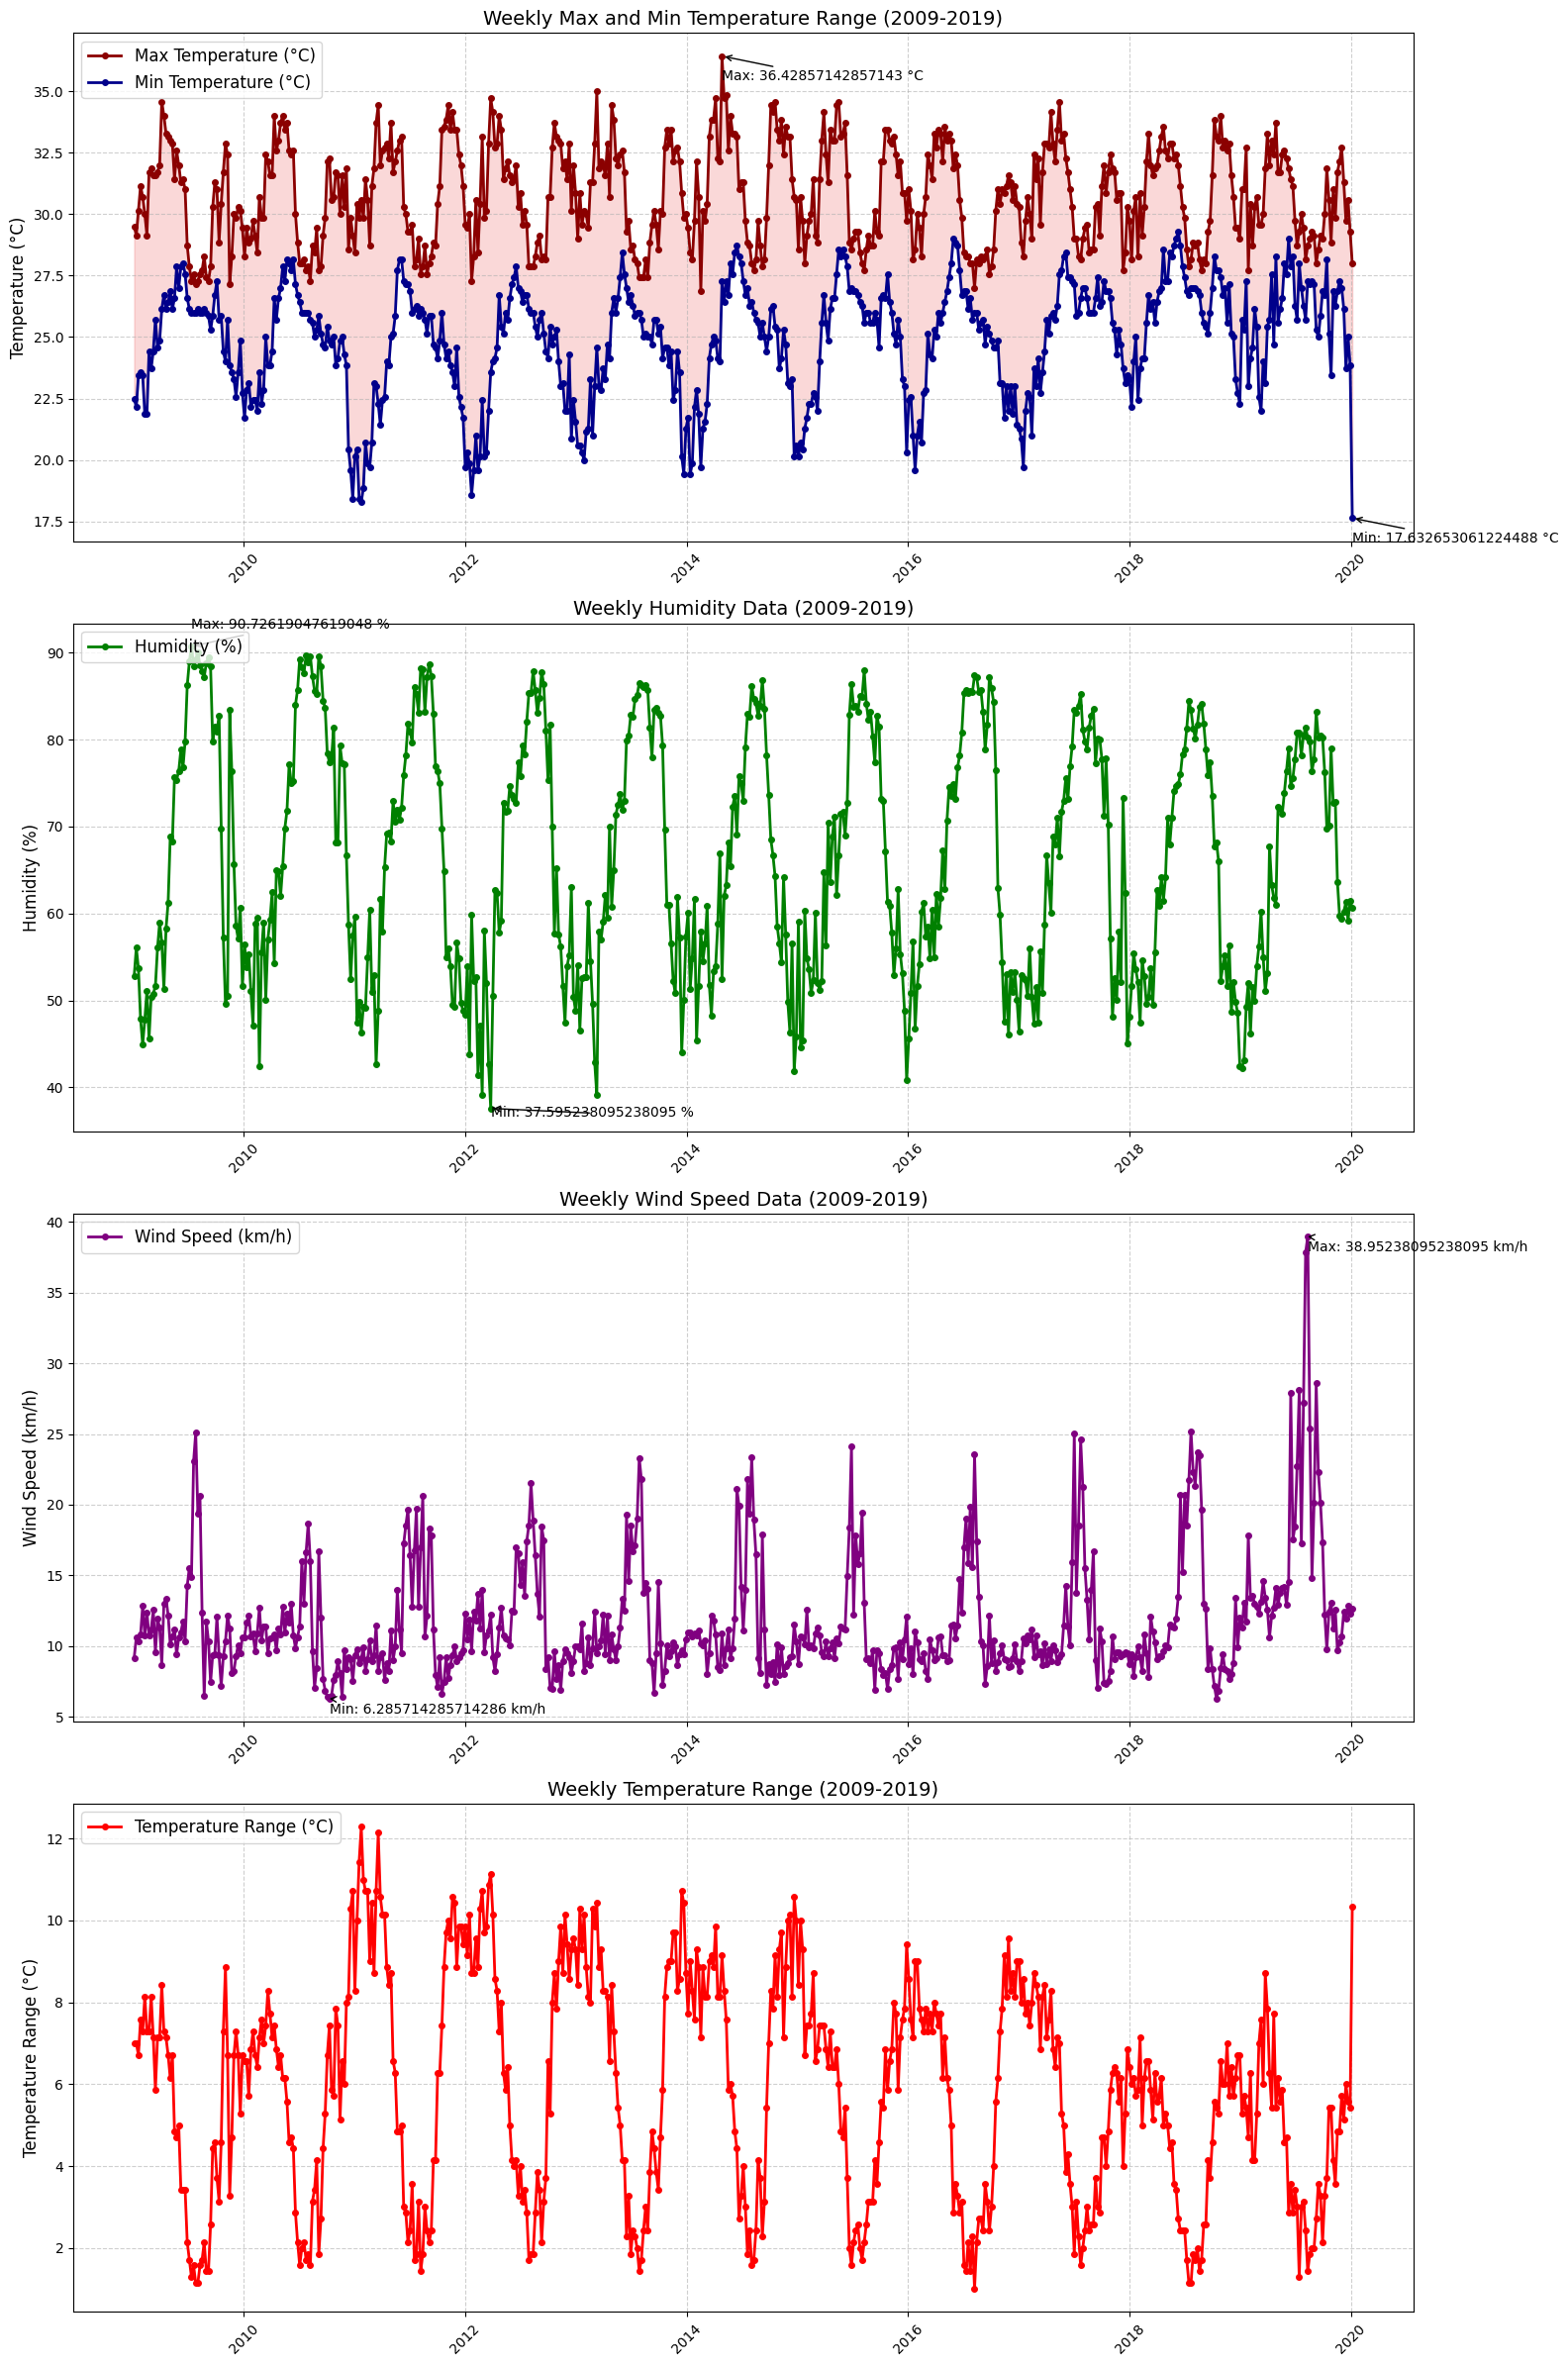

In [46]:
#Visualisasi Data Hasil Numpy
# Plot Max and Min Temperature Range
plt.figure(figsize=(16, 24))
plt.subplot(4, 1, 1)
plt.plot(resampled_data.index, max_temp_data, label='Max Temperature (°C)', color='darkred', marker='o', linestyle='-', markersize=4, linewidth=2)
plt.plot(resampled_data.index, min_temp_data, label='Min Temperature (°C)', color='darkblue', marker='o', linestyle='-', markersize=4, linewidth=2)
plt.fill_between(resampled_data.index, min_temp_data, max_temp_data, color='lightcoral', alpha=0.3)

# Annotate max temperature
plt.annotate(f'Max: {max_temp} °C',
             xy=(resampled_data.index[index_max_temp], max_temp),
             xytext=(resampled_data.index[index_max_temp], max_temp - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)
# Annotate min temperature
plt.annotate(f'Min: {min_temp} °C', xy=(resampled_data.index[index_min_temp], min_temp),
             xytext=(resampled_data.index[index_min_temp], min_temp - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
# Annotate average temperature
plt.legend(loc='upper left', fontsize=12)
# Add grid, labels, and title
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Weekly Max and Min Temperature Range (2009-2019)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Plot Humidity Data
plt.subplot(4, 1, 2)
plt.plot(resampled_data.index, humidity_data, label='Humidity (%)', color='green', marker='o', linestyle='-', markersize=4, linewidth=2)

# Annotate max humidity
plt.annotate(f'Max: {max_humidity} %',
             xy=(resampled_data.index[index_max_humidity], max_humidity),
             xytext=(resampled_data.index[index_max_humidity], max_humidity + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Annotate min humidity
plt.annotate(f'Min: {min_humidity} %',
             xy=(resampled_data.index[index_min_humidity], min_humidity),
             xytext=(resampled_data.index[index_min_humidity], min_humidity - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Annotate average humidity
plt.legend(loc='upper left', fontsize=12)
# Add grid, labels, and title
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Weekly Humidity Data (2009-2019)', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Plot Wind Speed Data
plt.subplot(4, 1, 3)
plt.plot(resampled_data.index, wind_speed_data, label='Wind Speed (km/h)', color='purple', marker='o', linestyle='-', markersize=4, linewidth=2)

# Annotate max wind speed
plt.annotate(f'Max: {max_windspeed} km/h',
             xy=(resampled_data.index[index_max_windspeed], max_windspeed),
             xytext=(resampled_data.index[index_max_windspeed], max_windspeed - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Annotate min wind speed
plt.annotate(f'Min: {min_windspeed} km/h',
             xy=(resampled_data.index[index_min_windspeed], min_windspeed),
             xytext=(resampled_data.index[index_min_windspeed], min_windspeed - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Annotate average wind speed
plt.legend(loc='upper left', fontsize=12)
# Add grid, labels, and title
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Weekly Wind Speed Data (2009-2019)', fontsize=14)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)


# Plot Rentang Suhu (Temperature Range)
plt.subplot(4, 1, 4)
plt.plot(resampled_data.index, temperature_range, label='Temperature Range (°C)', color='red', marker='o', linestyle='-', markersize=4, linewidth=2)
plt.title('Weekly Temperature Range (2009-2019)', fontsize=14)
plt.ylabel('Temperature Range (°C)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)

# Final layout adjustments
plt.tight_layout()
plt.show()

Implementation of Functions

In [47]:
#Fungsi 1: Calculate Statistics untuk max, min, mean, index max, dan index min
def calculate_statistics(data, label, unit):
    max_value = np.max(data)
    min_value = np.min(data)
    avg_value = np.mean(data)
    index_max_value = np.argmax(data)
    index_min_value = np.argmin(data)

    # Print results with 3 decimal places for all values
    print(f"Max {label}: {max_value:.3f} {unit}")
    print(f"Min {label}: {min_value:.3f} {unit}")
    print(f"Average {label}: {avg_value:.3f} {unit}")
    print(f"Max {label} Index: {index_max_value} ({label}: {data[index_max_value]:.3f} {unit})")
    print(f"Min {label} Index: {index_min_value} ({label}: {data[index_min_value]:.3f} {unit})")
    print()  # Line break for readability

# Usage for temperature, humidity, precipitation, and wind speed data
calculate_statistics(max_temp_data, "Temperature", "°C")
calculate_statistics(humidity_data, "Humidity", "%")
calculate_statistics(wind_speed_data, "Wind Speed", "km/h")

#Fungsi 2: Print First Data per Year
def print_first_data_per_year(data, start_year=2009, end_year=2019):
    # Group the data by year and select the first entry of each year
    first_data_per_year = data.groupby(data.index.year).first()

    # Extract arrays for each required data column
    years = first_data_per_year.index
    first_max_temp_data = np.array(first_data_per_year['maxtempC'])  # Max temperature
    first_min_temp_data = np.array(first_data_per_year['mintempC'])  # Min temperature
    first_temp_data = np.array(first_data_per_year['tempC'])  # Average temperature
    first_humidity_data = np.array(first_data_per_year['humidity'])  # Humidity
    first_wind_speed_data = np.array(first_data_per_year['windspeedKmph'])  # Wind speed

    # Print the first data for each year in the specified range
    for i, year in enumerate(years):
        if start_year <= year <= end_year:
            print(f"Year: {year}")
            print(f"  Max Temp: {first_max_temp_data[i]:.3f} °C")
            print(f"  Min Temp: {first_min_temp_data[i]:.3f} °C")
            print(f"  Avg Temp: {first_temp_data[i]:.3f} °C")
            print(f"  Humidity: {first_humidity_data[i]:.3f} %")
            print(f"  Wind Speed: {first_wind_speed_data[i]:.3f} km/h")

print_first_data_per_year(resampled_data, 2009, 2019)

Max Temperature: 36.429 °C
Min Temperature: 26.857 °C
Average Temperature: 30.758 °C
Max Temperature Index: 277 (Temperature: 36.429 °C)
Min Temperature Index: 267 (Temperature: 26.857 °C)

Max Humidity: 90.726 %
Min Humidity: 37.595 %
Average Humidity: 66.693 %
Max Humidity Index: 27 (Humidity: 90.726 %)
Min Humidity Index: 168 (Humidity: 37.595 %)

Max Wind Speed: 38.952 km/h
Min Wind Speed: 6.286 km/h
Average Wind Speed: 11.800 km/h
Max Wind Speed Index: 553 (Wind Speed: 38.952 km/h)
Min Wind Speed Index: 92 (Wind Speed: 6.286 km/h)

Year: 2009
  Max Temp: 29.500 °C
  Min Temp: 22.500 °C
  Avg Temp: 25.583 °C
  Humidity: 52.812 %
  Wind Speed: 9.167 km/h
Year: 2010
  Max Temp: 28.286 °C
  Min Temp: 21.714 °C
  Avg Temp: 24.696 °C
  Humidity: 56.405 %
  Wind Speed: 10.649 km/h
Year: 2011
  Max Temp: 28.429 °C
  Min Temp: 20.143 °C
  Avg Temp: 24.030 °C
  Humidity: 59.583 %
  Wind Speed: 9.369 km/h
Year: 2012
  Max Temp: 29.571 °C
  Min Temp: 19.714 °C
  Avg Temp: 24.446 °C
  Humidity

**Data Modelling**

**PCA (Principal Component Analysis) to analyze data as a whole**

Preparation for model

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assume filtered_data and weekly resampling
daily_data = filtered_data.resample('D').mean()

# Select relevant columns
features = ['tempC', 'humidity', 'windspeedKmph']
data = daily_data[features]

Standardize, Apply PCA, and Styling for cluster colors

In [49]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Define thresholds for coloring based on the first PCA component
cool_threshold = -1  # Cool conditions
warm_threshold = 1   # Warm conditions

# Assign specific colors based on thresholds
colors = [
    'blue' if x < cool_threshold else
    'red' if x > warm_threshold else
    'orange'
    for x in data_pca[:, 0]
]

Plotting 2D and 3D PCA Plot

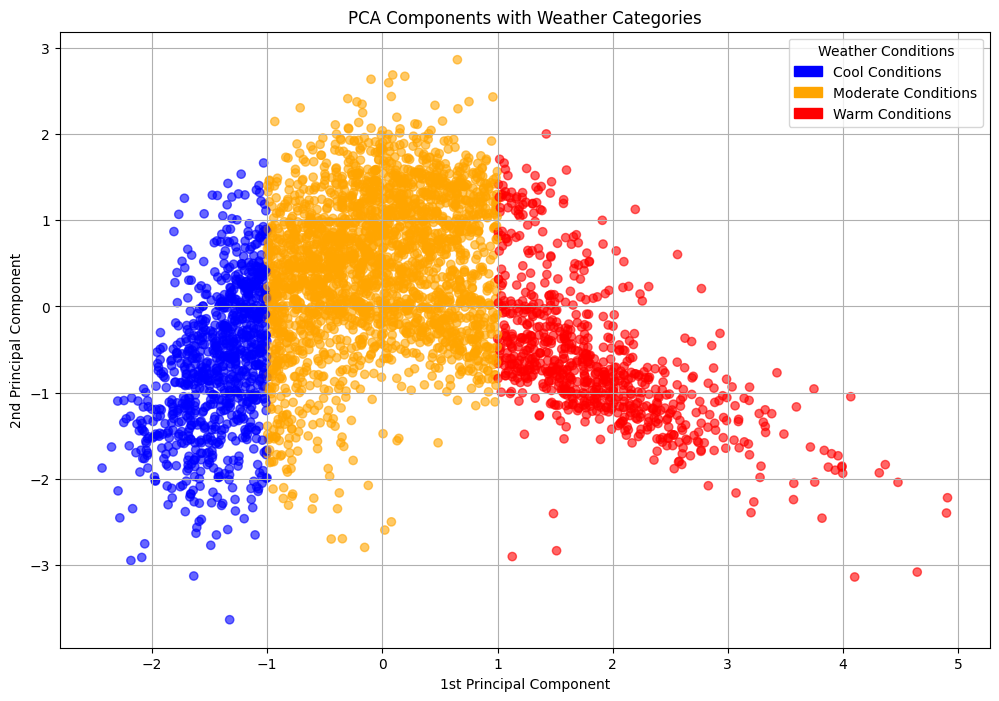

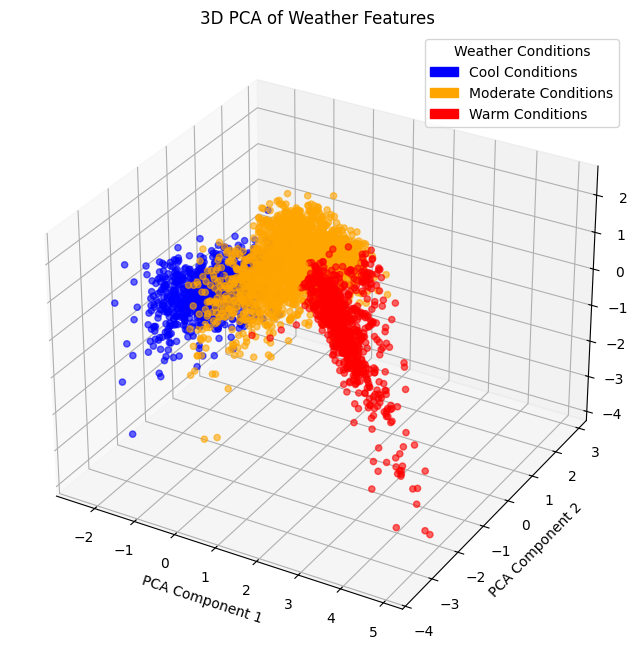

In [50]:
# 2D PCA Plot with specific colors
plt.figure(figsize=(12, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=colors, alpha=0.6)

plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('PCA Components with Weather Categories')

# Create legend patches with specific colors
cool_patch = mpatches.Patch(color='blue', label='Cool Conditions')
moderate_patch = mpatches.Patch(color='orange', label='Moderate Conditions')
warm_patch = mpatches.Patch(color='red', label='Warm Conditions')

# Add legend and grid
plt.legend(handles=[cool_patch, moderate_patch, warm_patch], title="Weather Conditions")
plt.grid()
plt.show()

# 3D PCA Plot with specific colors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point in 3D with specific colors
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=colors, alpha=0.6)

# Set labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA of Weather Features')

# Create legend for 3D plot
ax.legend(handles=[cool_patch, moderate_patch, warm_patch], title="Weather Conditions")

plt.show()

**SARIMA MODEL**

Preparation for Model and Functions

In [51]:
#SARMIA Model Building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

# Define the date ranges for historical and comparison data
start_date_2009 = pd.to_datetime('2009-01-01')
end_date_2018 = pd.to_datetime('2018-12-31')
start_date_2019 = pd.to_datetime('2019-01-01')
end_date_2019 = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018 and 2019 separately
filtered_data_actual = filtered_data[(filtered_data.index >= start_date_2009) & (filtered_data.index <= end_date_2018)]
filtered_data_comparison = filtered_data[(filtered_data.index >= start_date_2019) & (filtered_data.index <= end_date_2019)]

# Resample to weekly data
df_weekly = filtered_data_actual.resample('W').mean()
df_weekly_comparison = filtered_data_comparison.resample('W').mean()

# Define the function to find and remove outliers based on IQR
def remove_outliers_iqr(df, numerical_columns):
    # Calculate the IQR for each numerical column
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing rows where any column value is outside the IQR range (outliers)
    df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

    return df_no_outliers

# List of numerical columns to check for outliers
numerical_columns = ['tempC']

# Remove outliers from both the filtered data sets
df_weekly_no_outliers = remove_outliers_iqr(df_weekly, numerical_columns)
df_weekly_comparison_no_outliers = remove_outliers_iqr(df_weekly_comparison, numerical_columns)

# Prepare the data series for further analysis or plotting
series = df_weekly_no_outliers['tempC']
comparison_series_2019 = df_weekly_comparison_no_outliers['tempC']

# ADF Test for checking if data is stationary
# ADF Test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

def adf_pvalue(series):
    result = adfuller(series)
    print('p-value:', result[1])

Testing to figure out the best values for p(AutoRegressive), d(differencing), q(MovingAverage)

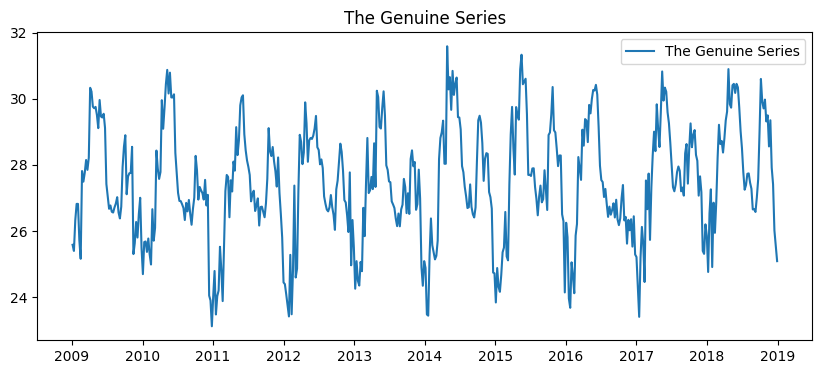

ADF Test on Original Series:
ADF Statistic: -8.59611002884203
p-value: 7.070496817625539e-14
Series is stationary

ADF Test on First Order Differencing:
ADF Statistic: -10.292953878557688
p-value: 3.530821790388833e-18
Series is stationary

ADF Test on Second Order Differencing:
ADF Statistic: -10.24963266229337
p-value: 4.521246549232831e-18
Series is stationary


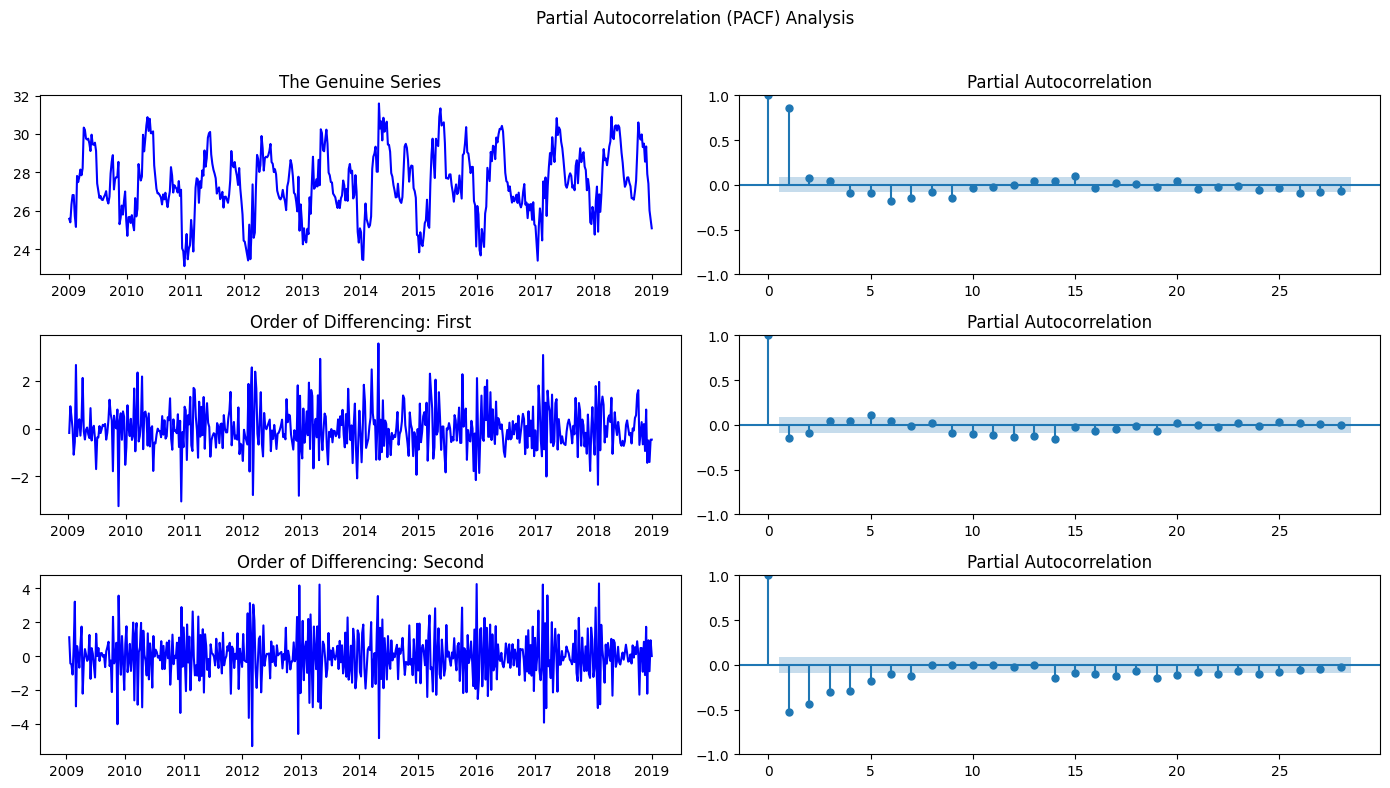

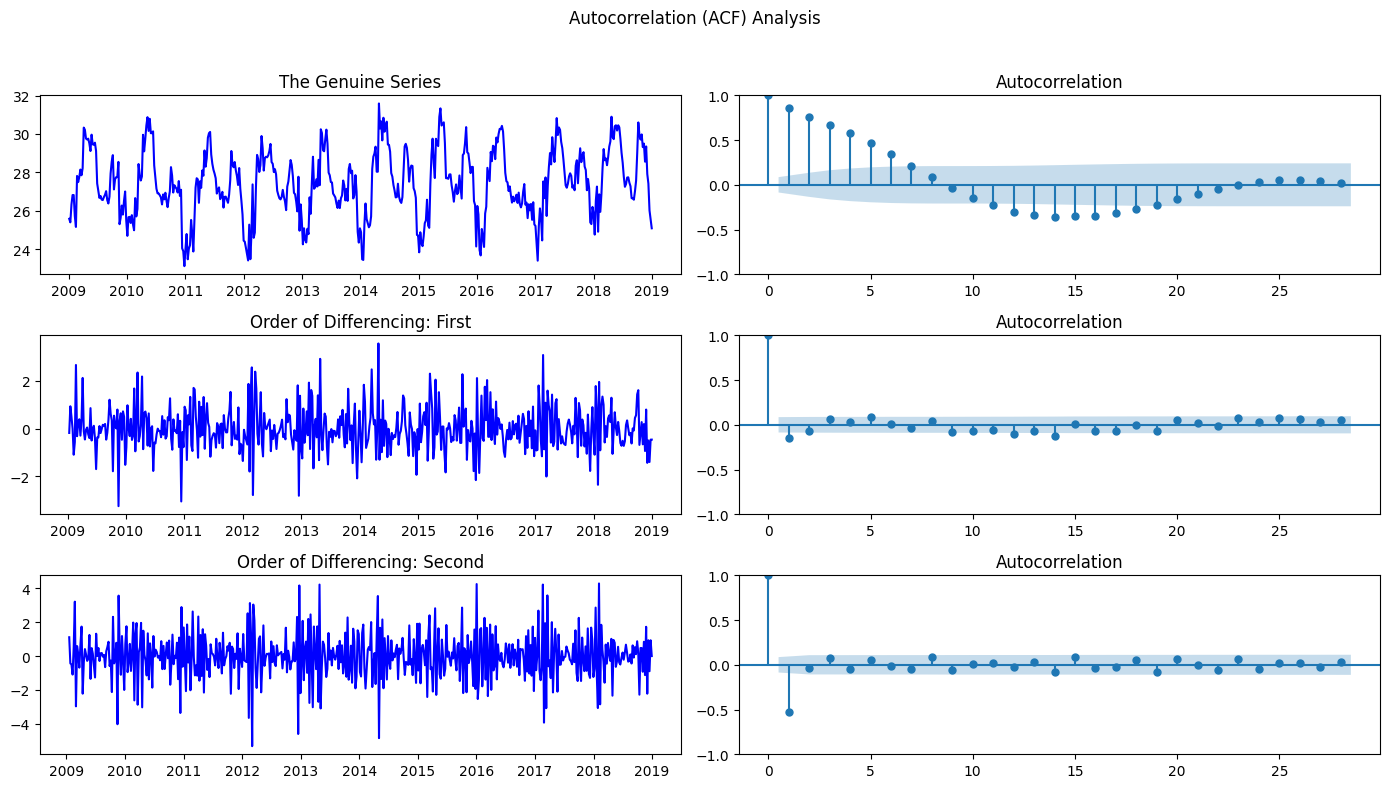

p-value: 7.070496817625539e-14
p-value: 3.530821790388833e-18
p-value: 4.521246549232831e-18


In [52]:
# SARIMA Plot

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(series, label='The Genuine Series')
plt.title("The Genuine Series")
plt.legend()
plt.show()

# Original Series and ADF test
print("ADF Test on Original Series:")
adf_test(series)

# First Order Differencing
first_diff = series.diff().dropna()
print("\nADF Test on First Order Differencing:")
adf_test(first_diff)

# Second Order Differencing
second_diff = first_diff.diff().dropna()
print("\nADF Test on Second Order Differencing:")
adf_test(second_diff)

# Determine the p value
# PACF to determine AR terms (p)
# Plotting Original, First Differencing, Second Differencing
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Partial Autocorrelation (PACF) Analysis")

# Plot the Genuine Series and its ACF
axes[0, 0].plot(series, color='blue')
axes[0, 0].set_title("The Genuine Series")
plot_pacf(series.dropna(), ax=axes[0, 1])

# Plot First Order Differencing and its ACF
axes[1, 0].plot(first_diff, color='blue')
axes[1, 0].set_title("Order of Differencing: First")
plot_pacf(first_diff, ax=axes[1, 1])

# Plot Second Order Differencing and its ACF
axes[2, 0].plot(second_diff, color='blue')
axes[2, 0].set_title("Order of Differencing: Second")
plot_pacf(second_diff, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Determine the q value
# ACF to determine MA terms (q)
# Plotting Original, First Differencing, Second Differencing
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Autocorrelation (ACF) Analysis")

# Plot the Genuine Series and its ACF
axes[0, 0].plot(series, color='blue')
axes[0, 0].set_title("The Genuine Series")
plot_acf(series.dropna(), ax=axes[0, 1])

# Plot First Order Differencing and its ACF
axes[1, 0].plot(first_diff, color='blue')
axes[1, 0].set_title("Order of Differencing: First")
plot_acf(first_diff, ax=axes[1, 1])

# Plot Second Order Differencing and its ACF
axes[2, 0].plot(second_diff, color='blue')
axes[2, 0].set_title("Order of Differencing: Second")
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Determine the d value
adf_pvalue(series)
adf_pvalue(first_diff)
adf_pvalue(second_diff)

Configuring the SARIMA model and plot the predictions

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              tempC   No. Observations:                  520
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -583.521
Date:                            Wed, 18 Dec 2024   AIC                           1177.043
Time:                                    08:36:59   BIC                           1197.774
Sample:                                         0   HQIC                          1185.201
                                            - 520                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3947      0.048      8.165      0.000       0.300       0.489
ma.L1         -0.9366      0.021   

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 1200x600 with 0 Axes>

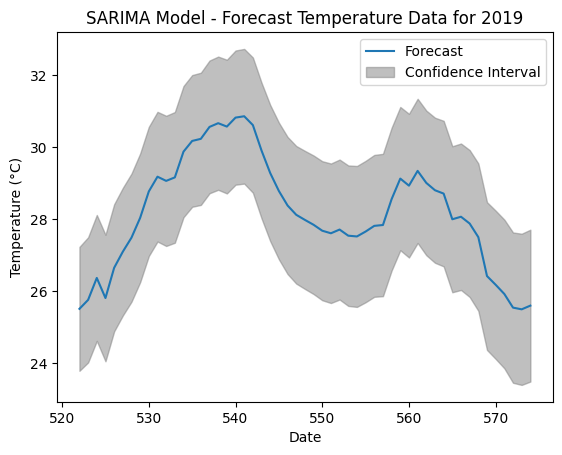

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


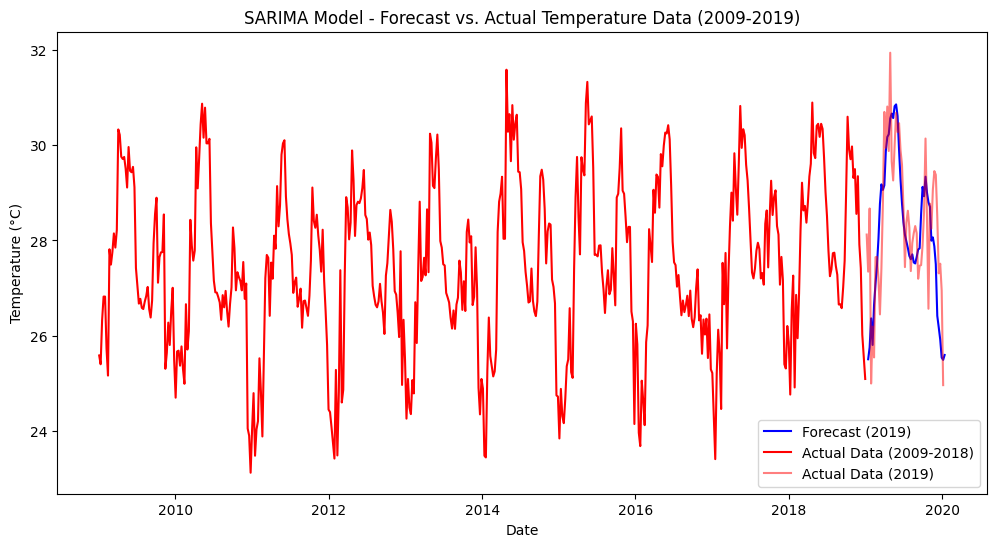

In [53]:
# Set ARIMA parameters (choose p, d, q based on ACF, PACF, and ADF tests)
# Berdasarkan hasil PACF, karena nilai signifikan di lag 1, maka p = 1
# Berdasarkan hasil ACF, karena nilai signifikan di lag 1, maka q = 1
# Berdasarkan hasil ADF, karena setelah lag 1 lebih stabil dan p value < 0.05, maka d = 1
# p = AR, d = differencing, q = MA, s = seasonality

# Set SARIMA parameters (p, d, q) and (P, D, Q, S) for seasonality
# Let's assume you have yearly seasonality, so S = 365 (for daily data with yearly patterns)
p, d, q = 1, 1, 1  # Non-seasonal ARIMA parameters
P, D, Q, S = 1, 1, 1, 52  # Seasonal ARIMA parameters (yearly seasonality)

# Fit SARIMA model
sarima_model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_model_fit = sarima_model.fit(disp=False)
print(sarima_model_fit.summary())

# Find the indices for these dates in the dataset
start_loc = len(df_weekly) - 1
end_loc = start_loc + 52

# Plot the SARIMA model's predictions
plt.figure(figsize=(12, 6))
plot_predict(sarima_model_fit, start=start_loc, end=end_loc, dynamic=False)

# Customize the plot
plt.title("SARIMA Model - Forecast Temperature Data for 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(["Forecast", "Confidence Interval"])
plt.show()

# Forecast 52 weeks ahead
forecast = sarima_model_fit.get_prediction(start=start_loc, end=end_loc)
forecast_mean = forecast.predicted_mean

# Define forecast dates
forecast_dates = pd.date_range(start=df_weekly.index[-1] + pd.Timedelta(weeks=1), periods=len(forecast_mean), freq='W')

# Plotting
plt.figure(figsize=(12, 6))

# Plot the forecasted values
plt.plot(forecast_dates, forecast_mean, color='blue', linewidth=1.5, label="Forecast (2019)")

# Plot the actual data up to 2018
plt.plot(df_weekly_no_outliers.index, df_weekly_no_outliers['tempC'], color='red', linewidth=1.5, label="Actual Data (2009-2018)")

# Plot the actual data for 2019 separately, without markers for a cleaner look
plt.plot(df_weekly_comparison_no_outliers.index, df_weekly_comparison_no_outliers['tempC'], color='red', linewidth=1.5, alpha=0.5, label="Actual Data (2019)")

# Customize the plot
plt.title("SARIMA Model - Forecast vs. Actual Temperature Data (2009-2019)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

**SARIMA MODEL PREDICTION 2020**

Preparation for the model and functions

In [54]:
#SARMIA Model Building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the date ranges for historical and comparison data
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018 and 2019 separately
filtered_data_actual = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]

# Resample to weekly data
df_weekly = filtered_data_actual.resample('W').mean()

# Define the function to find and remove outliers based on IQR
def remove_outliers_iqr(df, numerical_columns):
    # Calculate the IQR for each numerical column
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing rows where any column value is outside the IQR range (outliers)
    df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

    return df_no_outliers

# Define a function to calculate evaluation metrics
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"=== Evaluation Metrics for {model_name} ===")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("==========================================\n")

    return mae, r2

# List of numerical columns to check for outliers
numerical_columns = ['tempC']

# Remove outliers from both the filtered data sets
df_weekly_no_outliers = remove_outliers_iqr(df_weekly, numerical_columns)

# Prepare the data series for further analysis or plotting
series = df_weekly_no_outliers['tempC']

Configuring the SARIMA model, prediction plot and evaluation

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              tempC   No. Observations:                  572
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -660.974
Date:                            Wed, 18 Dec 2024   AIC                           1331.947
Time:                                    08:37:31   BIC                           1353.207
Sample:                                         0   HQIC                          1340.276
                                            - 572                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4036      0.041      9.757      0.000       0.323       0.485
ma.L1         -0.9558      0.016   

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 1200x600 with 0 Axes>

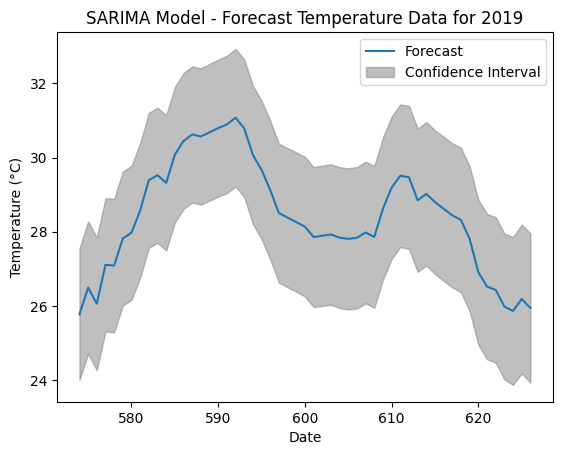

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


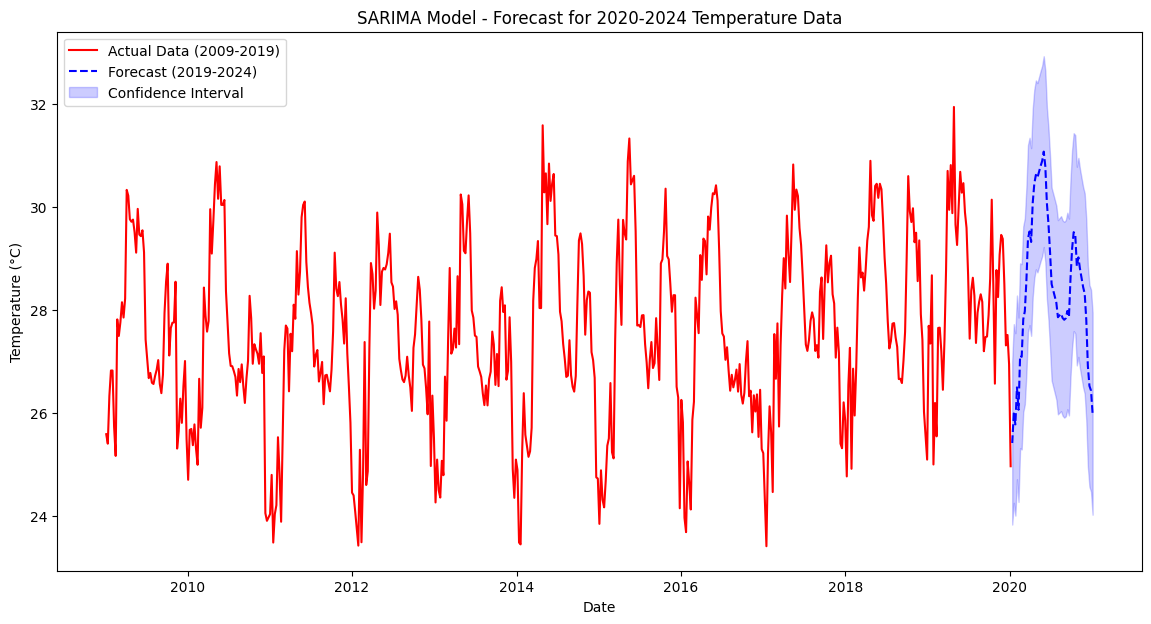

=== Evaluation Metrics for SARIMAX ===
Mean Absolute Error (MAE): 0.73
R-squared (R²): 0.6341



In [55]:
# Set ARIMA parameters (choose p, d, q based on ACF, PACF, and ADF tests)
# Berdasarkan hasil PACF, karena nilai signifikan di lag 1, maka p = 1
# Berdasarkan hasil ACF, karena nilai signifikan di lag 1, maka q = 1
# Berdasarkan hasil ADF, karena setelah lag 1 lebih stabil dan p value < 0.05, maka d = 1
# p = AR, d = differencing, q = MA, s = seasonality

# Set SARIMA parameters (p, d, q) and (P, D, Q, S) for seasonality
# Let's assume you have yearly seasonality, so S = 365 (for daily data with yearly patterns)
p, d, q = 1, 1, 1  # Non-seasonal ARIMA parameters
P, D, Q, S = 1, 1, 1, 52  # Seasonal ARIMA parameters (yearly seasonality)

# Fit SARIMA model
sarima_model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_model_fit = sarima_model.fit(disp=False)
print(sarima_model_fit.summary())

# Find the indices for these dates in the dataset
start_loc = len(df_weekly) - 1
end_loc = start_loc + 52

# Plot the SARIMA model's predictions
plt.figure(figsize=(12, 6))
plot_predict(sarima_model_fit, start=start_loc, end=end_loc, dynamic=False)

# Customize the plot
plt.title("SARIMA Model - Forecast Temperature Data for 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(["Forecast", "Confidence Interval"])
plt.show()

# Define the new extended forecast range
new_forecast_periods = 52  # Forecast for the next 104 weeks (2 years as an example)
forecast_dates = pd.date_range(start=df_weekly.index[-1] + pd.Timedelta(weeks=1), periods=new_forecast_periods, freq='W')

# Generate forecasts for the extended range
extended_forecast = sarima_model_fit.get_forecast(steps=new_forecast_periods)
forecast_mean = extended_forecast.predicted_mean
forecast_ci = extended_forecast.conf_int()  # Confidence intervals

# Plot the original data and extended forecast
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(df_weekly_no_outliers.index, df_weekly_no_outliers['tempC'], color='red', label="Actual Data (2009-2019)")

# Plot the forecasted values
plt.plot(forecast_dates, forecast_mean, color='blue', linestyle='--', label="Forecast (2019-2024)")

# Plot confidence intervals
plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='blue', alpha=0.2, label="Confidence Interval")

# Customize the plot
plt.title("SARIMA Model - Forecast for 2020-2024 Temperature Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

actual_data = series[-new_forecast_periods:]  # Adjust to actual test data

# Evaluate SARIMAX
sarima_mae, sarima_r2 = evaluate_model(
    actual=actual_data,
    predicted=forecast_mean[:len(actual_data)],
    model_name="SARIMAX"
)

**Random Forest, XGBOOST, Decision Tree Regressor**

Correlation Matrix

Correlation with tempC:
tempC            1.000000
FeelsLikeC       0.895889
HeatIndexC       0.886647
mintempC         0.847546
maxtempC         0.676217
DewPointC        0.637549
uvIndex          0.588490
humidity         0.218352
sunHour          0.172808
cloudcover       0.073071
windspeedKmph    0.035800
precipMM        -0.017569
Name: tempC, dtype: float64


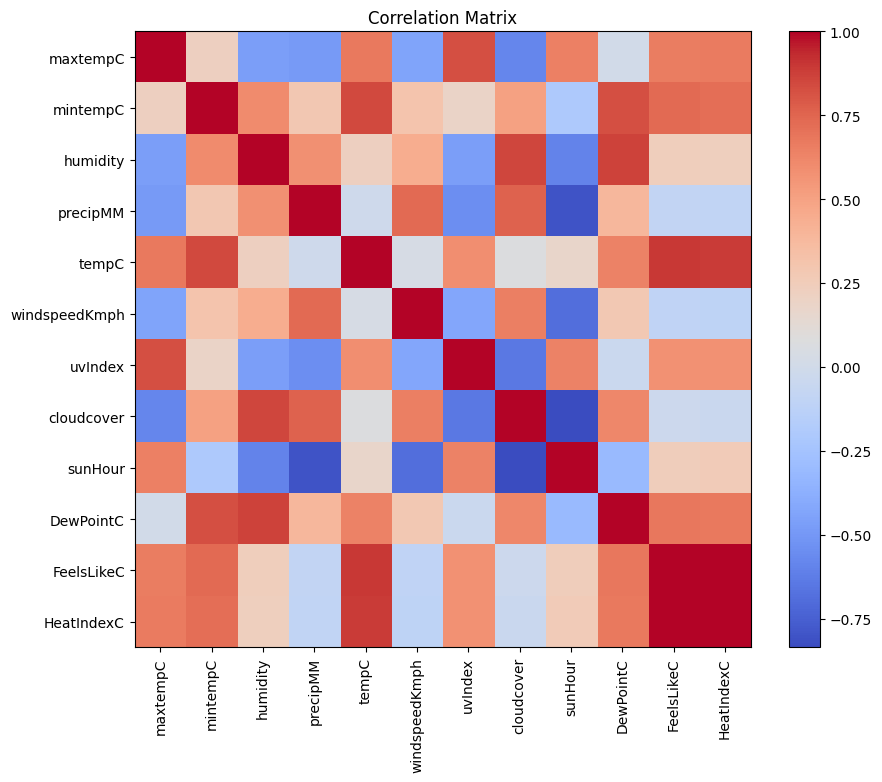

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_weekly.corr()

# Get the correlation of all features with 'tempC'
correlation_with_tempC = correlation_matrix['tempC'].sort_values(ascending=False)

# Display the correlation with tempC
print("Correlation with tempC:")
print(correlation_with_tempC)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

SelectKBest to find feature importance

Ranking Fitur Berdasarkan Skor:
         Feature       Score
6      DewPointC  392.409211
3        uvIndex  303.576948
0       humidity   28.687118
5        sunHour   17.637985
4     cloudcover    3.075919
2  windspeedKmph    0.735330
1       precipMM    0.176932


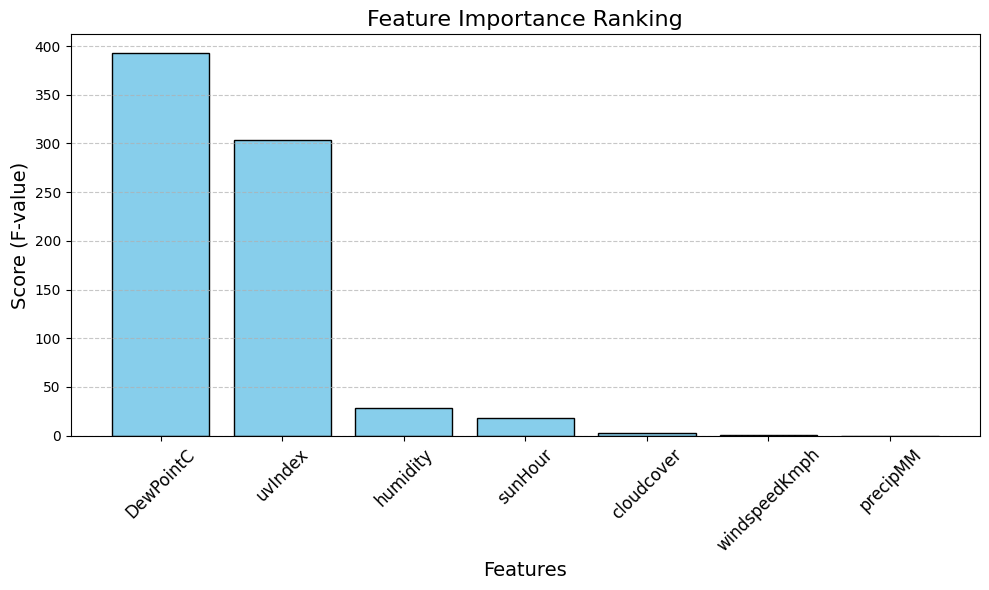

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Pisahkan target (y) dan fitur kandidat (X)
X = df_weekly.drop(columns=['tempC', 'FeelsLikeC', 'HeatIndexC', 'mintempC', 'maxtempC'])  # Semua kolom kecuali target dan yang mempunya korelasi terlalu tinggi
y = df_weekly['tempC']  # Kolom target

# Pastikan data bersih dari NaN
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Standarisasi data (untuk kestabilan model)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gunakan SelectKBest dengan F-value sebagai metode seleksi
k_best_selector = SelectKBest(score_func=f_regression, k='all')  # Pilih semua untuk melihat skor
X_new = k_best_selector.fit_transform(X_scaled, y)

# Tampilkan skor fitur
scores = k_best_selector.scores_
features = X.columns

# Gabungkan fitur dengan skor dalam bentuk DataFrame untuk analisis
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Cetak hasil
print("Ranking Fitur Berdasarkan Skor:")
print(feature_scores)

# Plot skor fitur
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue', edgecolor='black')
plt.title("Feature Importance Ranking", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Score (F-value)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()


Prediksi menggunakan XGBoost, Random Forest, Decision Tree Regressor

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn import metrics
from IPython.display import Image, SVG
import seaborn as sns
import pydotplus
from io import StringIO
import os

# Reading the CSV file
file_path = 'mumbai.csv'
data = pd.read_csv(file_path)

# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'cloudcover', 'sunHour', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']]

# Convert 'date_time' to datetime format (removing timezone awareness if it exists)
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)

# Path for Graphviz (adjust if needed)
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Convert 'date_time' to datetime and set it as the index
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])
weather_data.set_index('date_time', inplace=True)

# Resample data to weekly intervals (e.g., mean for temperature, sum for precipitation)
weekly_data = weather_data.resample('W').agg({
    'maxtempC': 'mean',      # Average max temperature per week
    'mintempC': 'mean',      # Average min temperature per week
    'tempC': 'mean',         # Average temperature per week
    'humidity': 'mean',      # Average humidity per week
    'precipMM': 'sum',       # Total precipitation per week
    'windspeedKmph': 'mean',  # Average wind speed per week
    'DewPointC': 'mean',      # Average dew point temperature per week
    'HeatIndexC': 'mean',     # Average heat index per week
    'cloudcover': 'mean',    # Average cloud cover per week
    'uvIndex': 'mean',       # Average UV Index per week
    'sunHour': 'mean'        # Average sunlight hours per week
})

# Add the additional feature 'temp_diff' to the weekly resampled data
weekly_data['temp_diff'] = weekly_data['maxtempC'] - weekly_data['mintempC']

# Reset index to bring 'date_time' back as a column
weekly_data.reset_index(inplace=True)

# Add 'year' column for filtering
weekly_data['year'] = weekly_data['date_time'].dt.year

# Filter data for training and testing
train_data = weekly_data[weekly_data['year'].between(2009, 2018)] #80% data training
test_data = weekly_data[weekly_data['year'].between(2019, 2020)] #20% data testing

# Define features and targets as before
feature_cols = ['uvIndex', 'humidity', 'cloudcover', 'DewPointC', 'windspeedKmph']
X_train = train_data[feature_cols]
y_train_reg = train_data['tempC']

X_test = test_data[feature_cols]
y_test_reg = test_data['tempC']

# Filter data for the full time frame (2009–2020)
full_data = weekly_data[weekly_data['year'].between(2009, 2018)]

# Define features and targets
X_full = full_data[feature_cols]
y_full_reg = full_data['tempC']

# ---------------------
# Random Forest Regressor
# ---------------------
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train_reg)
rf_y_pred = rf_reg.predict(X_test)
rf_r2 = r2_score(y_test_reg, rf_y_pred)
print(f"Random Forest R-Squared: {rf_r2:.2f}")

# ---------------------
# XGBoost Regressor
# ---------------------
xgb_reg = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_reg.fit(X_train, y_train_reg)
xgb_y_pred = xgb_reg.predict(X_test)
xgb_r2 = r2_score(y_test_reg, xgb_y_pred)
print(f"XGBoost R-Squared: {xgb_r2:.2f}")

# ---------------------
# Decision Tree Regressor
# ---------------------
dt_reg = DecisionTreeRegressor(max_depth=8, random_state=42)
dt_reg.fit(X_train, y_train_reg)
dt_y_pred = dt_reg.predict(X_test)
dt_r2 = r2_score(y_test_reg, dt_y_pred)
print(f"Decision Tree R-Squared: {dt_r2:.2f}")

C:\Users\andre\AppData\Local\Temp\ipykernel_10256\1314358086.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)
C:\Users\andre\AppData\Local\Temp\ipykernel_10256\1314358086.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])


Random Forest R-Squared: 0.82
XGBoost R-Squared: 0.83
Decision Tree R-Squared: 0.71


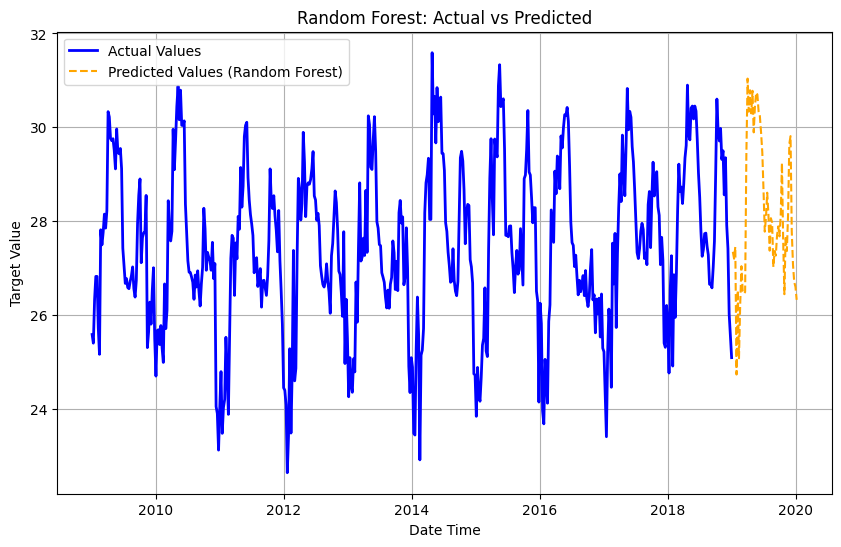

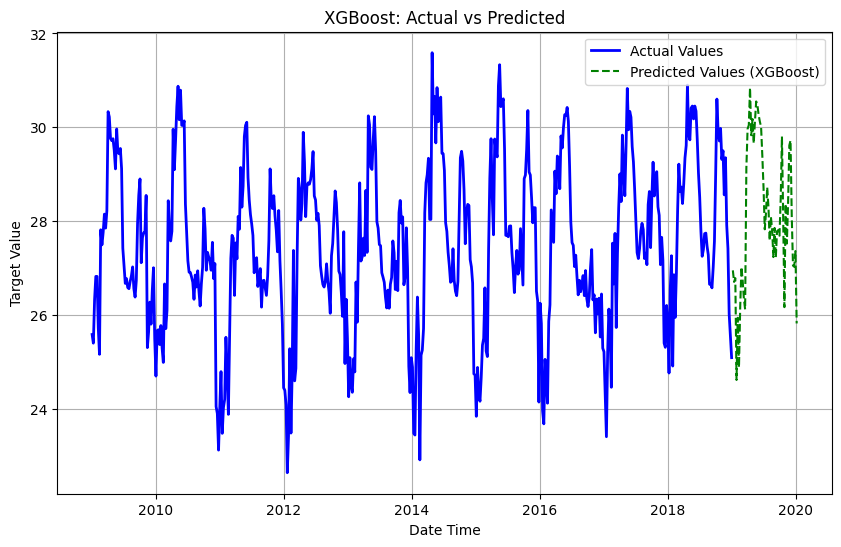

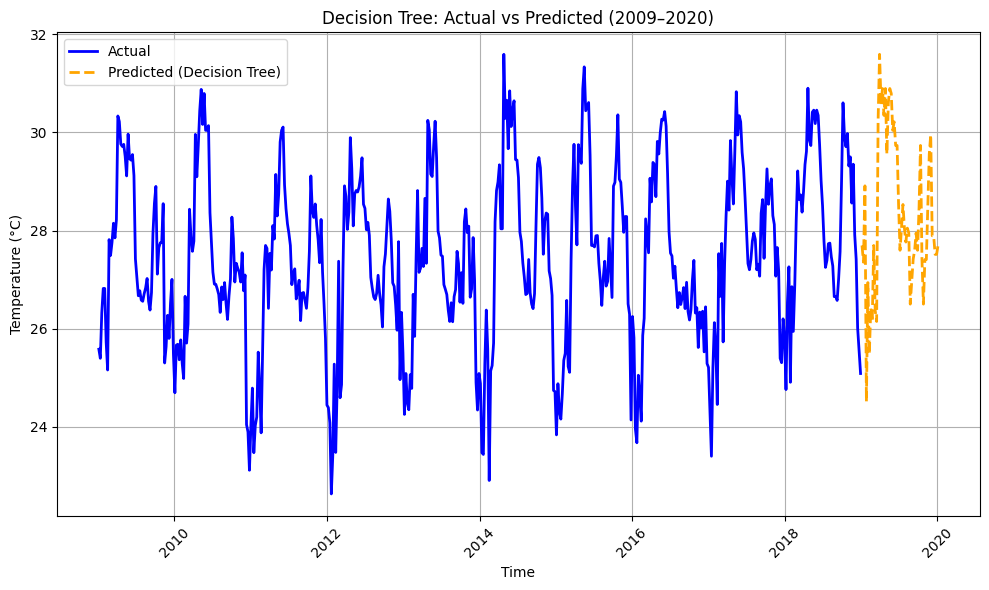

In [59]:
# ---------------------
# Plot 1: Actual vs Predicted (Random Forest)
# ---------------------
plt.figure(figsize=(10, 6))
plt.plot(full_data['date_time'], y_full_reg, label='Actual Values', color='blue', linewidth=2)  # Use y_full_reg here
plt.plot(test_data['date_time'], rf_y_pred, label='Predicted Values (Random Forest)', color='orange', linestyle='--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Date Time')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()
    
# ---------------------
# Plot 2: Actual vs Predicted (XGBoost)
# ---------------------
plt.figure(figsize=(10, 6))
plt.plot(full_data['date_time'], y_full_reg, label='Actual Values', color='blue', linewidth=2)  # Use y_full_reg here
plt.plot(test_data['date_time'], xgb_y_pred, label='Predicted Values (XGBoost)', color='green', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Date Time')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------
# Plot 3: Actual vs Predicted (DecisionTree)
# ---------------------
plt.figure(figsize=(10, 6))
plt.plot(full_data['date_time'], y_full_reg, label='Actual', color='blue', linewidth=2)
plt.plot(test_data['date_time'], dt_y_pred, label='Predicted (Decision Tree)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Decision Tree: Actual vs Predicted (2009–2020)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**SARIMAX MODEL**

Preparation for the model and functions

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the date ranges for historical and comparison data
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018
filtered_data_actual = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]

# Augmenting hourly data to weekly data
df_weekly = filtered_data_actual.resample('W').mean()

# Function to remove outliers using IQR
def remove_outliers_iqr(df, numerical_columns):
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]
    return df_no_outliers

# Define a function to calculate evaluation metrics
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"=== Evaluation Metrics for {model_name} ===")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("==========================================\n")

    return mae, r2

# List of numerical columns to check for outliers
numerical_columns = ['tempC']

# Remove outliers
df_weekly_no_outliers = remove_outliers_iqr(df_weekly, numerical_columns)

# Add the additional feature 'temp_diff' to the weekly resampled data
df_weekly_no_outliers['temp_diff'] = df_weekly_no_outliers['maxtempC'] - df_weekly_no_outliers['mintempC']

# Prepare data series and exogenous variables
series = df_weekly_no_outliers['tempC']
exogenous_columns = ['uvIndex', 'humidity', 'cloudcover', 'DewPointC', 'windspeedKmph', 'sunHour', 'temp_diff', 'precipMM']
exog_data = df_weekly_no_outliers[exogenous_columns]

C:\Users\andre\AppData\Local\Temp\ipykernel_10256\29798483.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekly_no_outliers['temp_diff'] = df_weekly_no_outliers['maxtempC'] - df_weekly_no_outliers['mintempC']


Configuring the SARIMAX model, prediction plot, and evaluation

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              tempC   No. Observations:                  572
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -283.902
Date:                            Wed, 18 Dec 2024   AIC                            593.804
Time:                                    08:39:23   BIC                            649.078
Sample:                                         0   HQIC                           615.459
                                            - 572                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
uvIndex           0.9378      0.076     12.393      0.000       0.789       1.086
humidity         -0.2010  

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


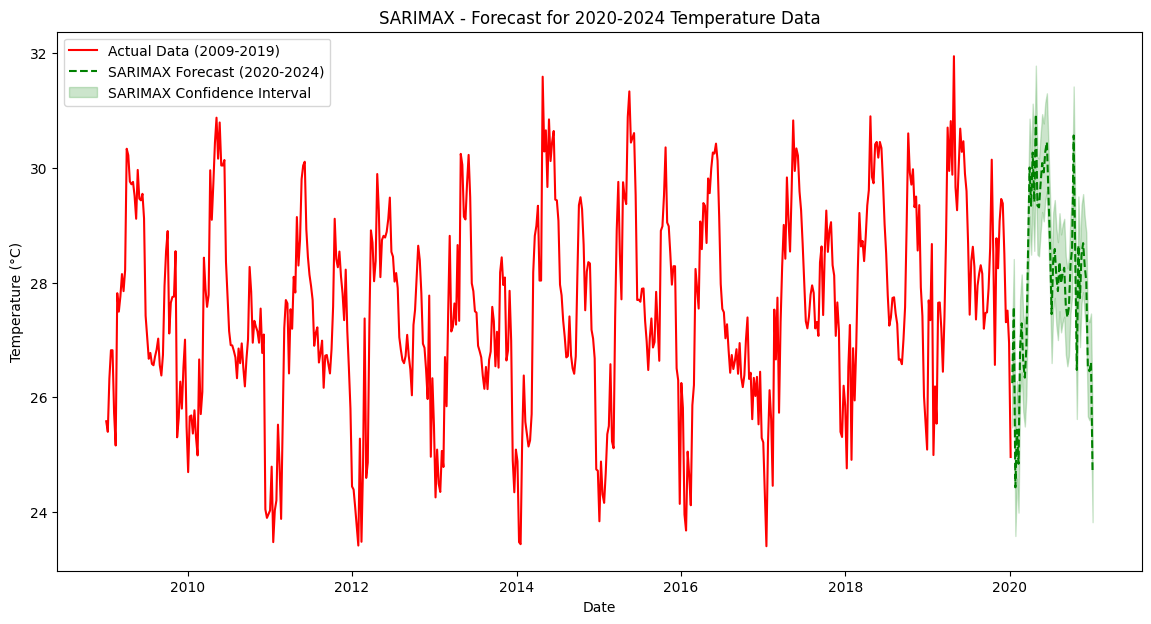

=== Evaluation Metrics for SARIMAX ===
Mean Absolute Error (MAE): 0.42
R-squared (R²): 0.8750



In [61]:
# SARIMA model parameters
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 52

# Fit SARIMAX model with exogenous variables
sarimax_model = SARIMAX(series, exog=exog_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarimax_model_fit = sarimax_model.fit(disp=False)
print(sarimax_model_fit.summary())

# Forecast periods and future exogenous data
new_forecast_periods = 52  # Forecast for a year
forecast_dates = pd.date_range(start=df_weekly.index[-1] + pd.Timedelta(weeks=1), periods=new_forecast_periods, freq='W')

# Generate forecasts for SARIMAX
exog_forecast = exog_data.iloc[-new_forecast_periods:]  # Use future exogenous data if available
sarimax_forecast = sarimax_model_fit.get_forecast(steps=new_forecast_periods, exog=exog_forecast)
sarimax_forecast_mean = sarimax_forecast.predicted_mean
sarimax_forecast_ci = sarimax_forecast.conf_int()

# Plot SARIMA and SARIMAX forecasts
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(df_weekly_no_outliers.index, df_weekly_no_outliers['tempC'], color='red', label="Actual Data (2009-2019)")

# Plot SARIMAX forecast
plt.plot(forecast_dates, sarimax_forecast_mean, color='green', linestyle='--', label="SARIMAX Forecast (2020-2024)")
plt.fill_between(forecast_dates, sarimax_forecast_ci.iloc[:, 0], sarimax_forecast_ci.iloc[:, 1], color='green', alpha=0.2, label="SARIMAX Confidence Interval")

# Customize the plot
plt.title("SARIMAX - Forecast for 2020-2024 Temperature Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

actual_data = series[-new_forecast_periods:]  # Adjust to actual test data

# Evaluate SARIMAX
sarimax_mae, sarimax_r2 = evaluate_model(
    actual=actual_data,
    predicted=sarimax_forecast_mean[:len(actual_data)],
    model_name="SARIMAX"
)

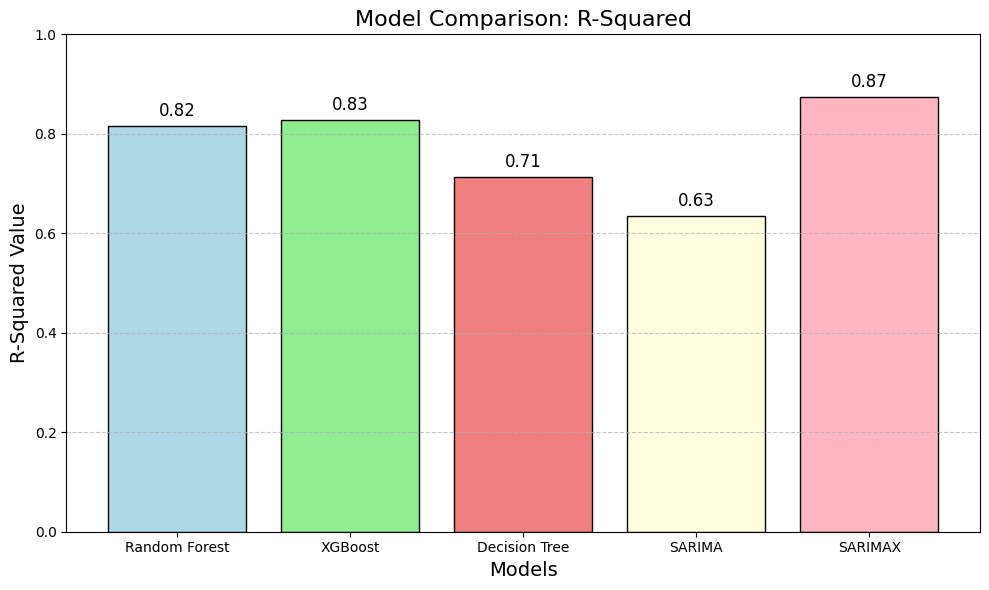

In [62]:
# ---------------------
# Plot 4: Comparison of R-Squared Values for Different Models
# ---------------------

# Create a list of model names and their corresponding R-squared values
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'SARIMA', 'SARIMAX']
r_squared_values = [rf_r2, xgb_r2, dt_r2, sarima_r2, sarimax_r2]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(models, r_squared_values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'], edgecolor='black')

# Adding title and labels
plt.title('Model Comparison: R-Squared', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-Squared Value', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Add value labels on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=12)

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Best Model for our weather data : SARIMAX

**Finding the best parameter SARIMAX for humidity**

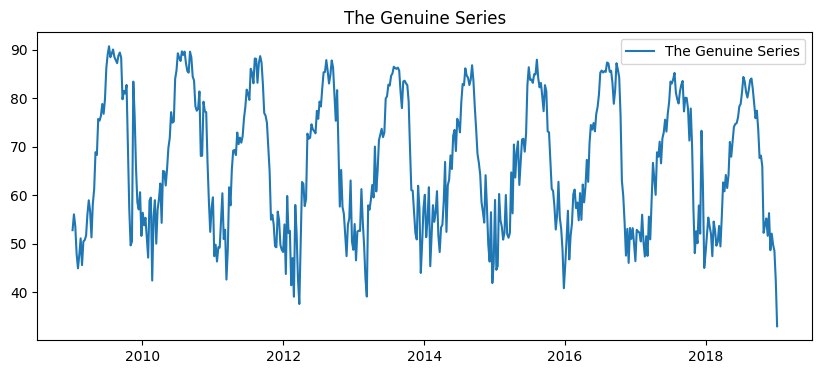

ADF Test on Original Series:
ADF Statistic: -8.877245027951867
p-value: 1.3475683659192398e-14
Series is stationary

ADF Test on First Order Differencing:
ADF Statistic: -6.730590115645679
p-value: 3.3037351522890037e-09
Series is stationary

ADF Test on Second Order Differencing:
ADF Statistic: -13.372860963252428
p-value: 5.156517907550775e-25
Series is stationary


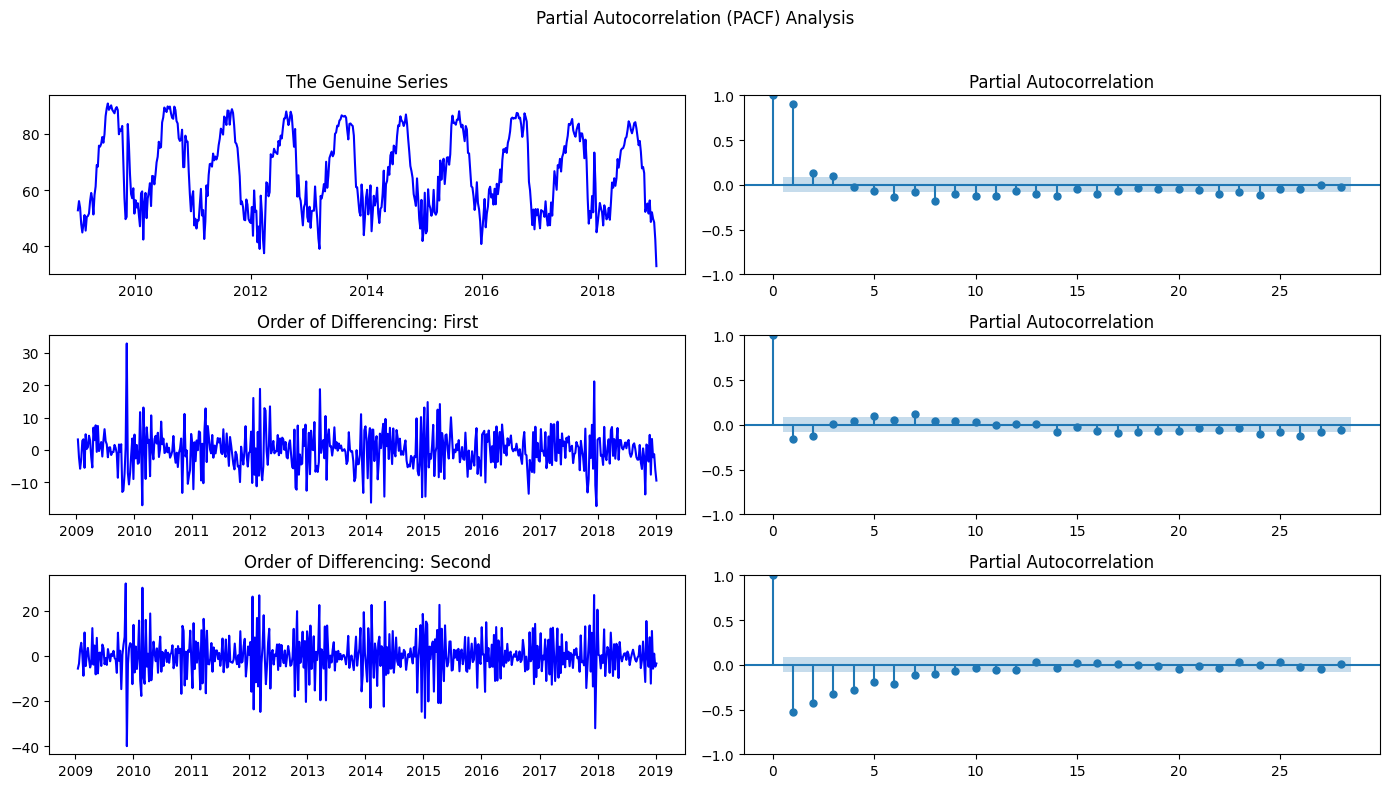

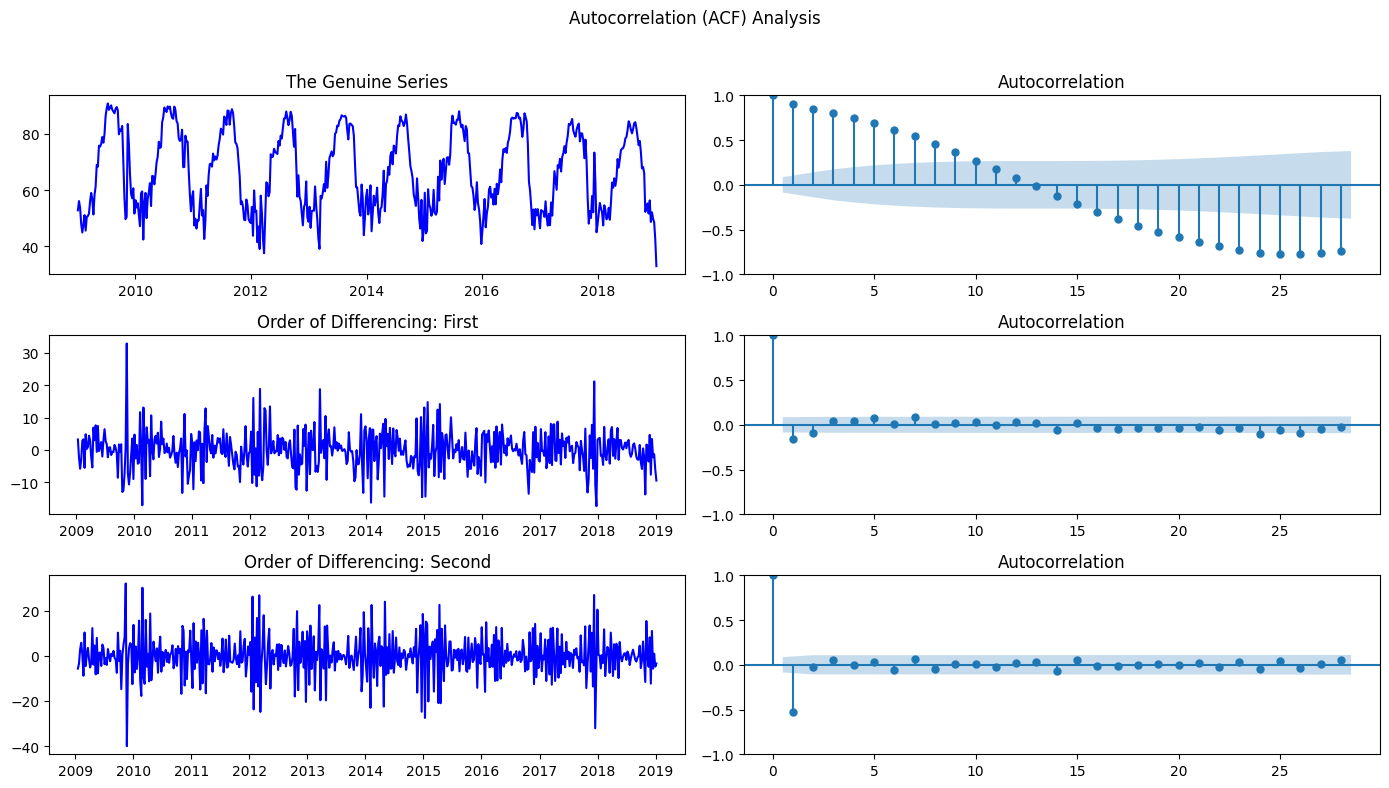

p-value: 1.3475683659192398e-14
p-value: 3.3037351522890037e-09
p-value: 5.156517907550775e-25


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

# Define the date ranges for historical and comparison data
start_date_2009 = pd.to_datetime('2009-01-01')
end_date_2018 = pd.to_datetime('2018-12-31')
start_date_2019 = pd.to_datetime('2019-01-01')
end_date_2019 = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018 and 2019 separately
filtered_data_actual = filtered_data[(filtered_data.index >= start_date_2009) & (filtered_data.index <= end_date_2018)]
filtered_data_comparison = filtered_data[(filtered_data.index >= start_date_2019) & (filtered_data.index <= end_date_2019)]

# Resample to weekly data
df_weekly = filtered_data_actual.resample('W').mean()
df_weekly_comparison = filtered_data_comparison.resample('W').mean()

# Define the function to find and remove outliers based on IQR
def remove_outliers_iqr(df, numerical_columns):
    # Calculate the IQR for each numerical column
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing rows where any column value is outside the IQR range (outliers)
    df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

    return df_no_outliers

# List of numerical columns to check for outliers
numerical_columns = ['humidity']

# Remove outliers from both the filtered data sets
df_weekly_no_outliers = remove_outliers_iqr(df_weekly, numerical_columns)
df_weekly_comparison_no_outliers = remove_outliers_iqr(df_weekly_comparison, numerical_columns)

# Prepare the data series for further analysis or plotting
series = df_weekly_no_outliers['humidity']
comparison_series_2019 = df_weekly_comparison_no_outliers['humidity']

# ADF Test for checking if data is stationary
# ADF Test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

def adf_pvalue(series):
    result = adfuller(series)
    print('p-value:', result[1])

# SARIMA Plot

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(series, label='The Genuine Series')
plt.title("The Genuine Series")
plt.legend()
plt.show()

# Original Series and ADF test
print("ADF Test on Original Series:")
adf_test(series)

# First Order Differencing
first_diff = series.diff().dropna()
print("\nADF Test on First Order Differencing:")
adf_test(first_diff)

# Second Order Differencing
second_diff = first_diff.diff().dropna()
print("\nADF Test on Second Order Differencing:")
adf_test(second_diff)

# Determine the p value
# PACF to determine AR terms (p)
# Plotting Original, First Differencing, Second Differencing
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Partial Autocorrelation (PACF) Analysis")

# Plot the Genuine Series and its ACF
axes[0, 0].plot(series, color='blue')
axes[0, 0].set_title("The Genuine Series")
plot_pacf(series.dropna(), ax=axes[0, 1])

# Plot First Order Differencing and its ACF
axes[1, 0].plot(first_diff, color='blue')
axes[1, 0].set_title("Order of Differencing: First")
plot_pacf(first_diff, ax=axes[1, 1])

# Plot Second Order Differencing and its ACF
axes[2, 0].plot(second_diff, color='blue')
axes[2, 0].set_title("Order of Differencing: Second")
plot_pacf(second_diff, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Determine the q value
# ACF to determine MA terms (q)
# Plotting Original, First Differencing, Second Differencing
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Autocorrelation (ACF) Analysis")

# Plot the Genuine Series and its ACF
axes[0, 0].plot(series, color='blue')
axes[0, 0].set_title("The Genuine Series")
plot_acf(series.dropna(), ax=axes[0, 1])

# Plot First Order Differencing and its ACF
axes[1, 0].plot(first_diff, color='blue')
axes[1, 0].set_title("Order of Differencing: First")
plot_acf(first_diff, ax=axes[1, 1])

# Plot Second Order Differencing and its ACF
axes[2, 0].plot(second_diff, color='blue')
axes[2, 0].set_title("Order of Differencing: Second")
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Determine the d value
adf_pvalue(series)
adf_pvalue(first_diff)
adf_pvalue(second_diff)

P= 1, Q = 1, D = 1

**Finding Exogenous variable and SARIMAX model for humidity**

Correlation with humidity:
humidity         1.000000
cloudcover       0.864446
DewPointC        0.862902
precipMM         0.656343
mintempC         0.623611
windspeedKmph    0.468455
tempC            0.232252
FeelsLikeC       0.225328
HeatIndexC       0.214504
uvIndex         -0.461585
maxtempC        -0.464648
sunHour         -0.592453
Name: humidity, dtype: float64


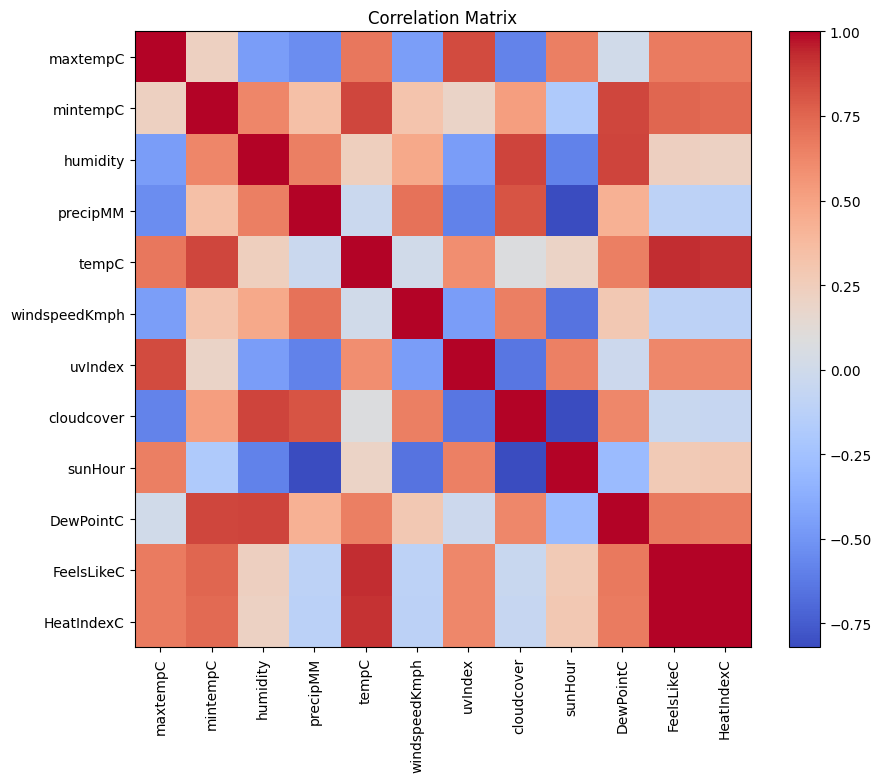

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_weekly_no_outliers.corr()

# Get the correlation of all features with 'tempC'
correlation_with_humidity = correlation_matrix['humidity'].sort_values(ascending=False)

# Display the correlation with tempC
print("Correlation with humidity:")
print(correlation_with_humidity)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Ranking Fitur Berdasarkan Skor:
          Feature        Score
6      cloudcover  1540.459208
8       DewPointC  1518.933962
2        precipMM   394.297459
1        mintempC   331.548367
7         sunHour   281.774901
4   windspeedKmph   146.478314
0        maxtempC   143.454113
5         uvIndex   141.058850
3           tempC    29.705729
9      FeelsLikeC    27.867390
10     HeatIndexC    25.128341


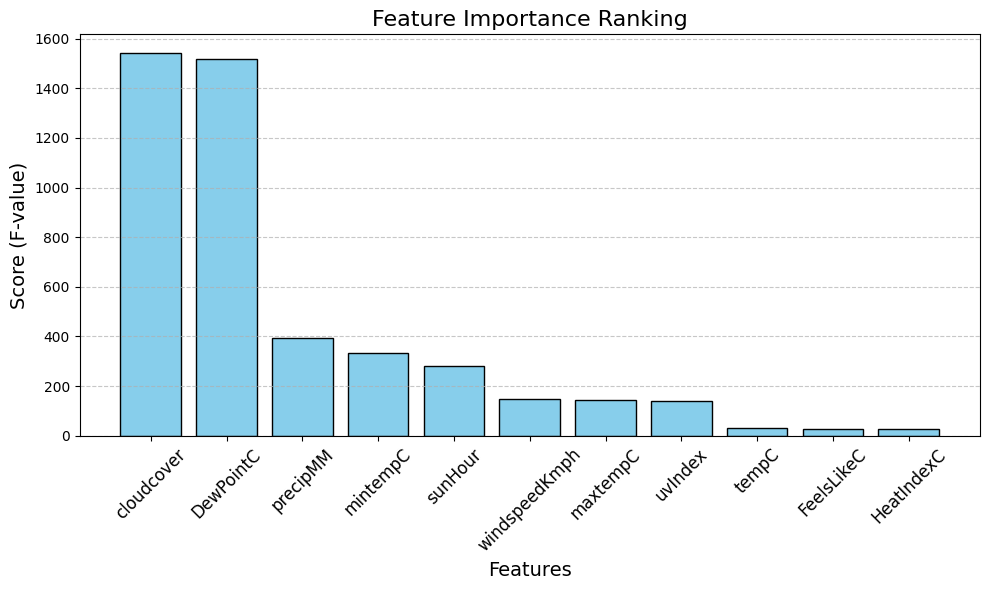

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Pisahkan target (y) dan fitur kandidat (X)
X = df_weekly.drop(columns=['humidity'])  # Semua kolom kecuali target dan yang mempunya korelasi terlalu tinggi
y = df_weekly['humidity']  # Kolom target

# Pastikan data bersih dari NaN
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Standarisasi data (untuk kestabilan model)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gunakan SelectKBest dengan F-value sebagai metode seleksi
k_best_selector = SelectKBest(score_func=f_regression, k='all')  # Pilih semua untuk melihat skor
X_new = k_best_selector.fit_transform(X_scaled, y)

# Tampilkan skor fitur
scores = k_best_selector.scores_
features = X.columns

# Gabungkan fitur dengan skor dalam bentuk DataFrame untuk analisis
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Cetak hasil
print("Ranking Fitur Berdasarkan Skor:")
print(feature_scores)

# Plot skor fitur
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue', edgecolor='black')
plt.title("Feature Importance Ranking", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Score (F-value)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the date ranges for historical and comparison data
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018
filtered_data_actual = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]

# Augmenting hourly data to weekly data
df_weekly = filtered_data_actual.resample('W').mean()

# Define a function to calculate evaluation metrics
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"=== Evaluation Metrics for {model_name} ===")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("==========================================\n")

    return mae, r2

# List of numerical columns to check for outliers
numerical_columns = ['humidity']

# Remove outliers
df_weekly_no_outliers = df_weekly

# Add the additional feature 'temp_diff' to the weekly resampled data
df_weekly_no_outliers['temp_diff'] = df_weekly_no_outliers['maxtempC'] - df_weekly_no_outliers['mintempC']

# Prepare data series and exogenous variables
series = df_weekly_no_outliers['humidity']
exogenous_columns = ['uvIndex', 'DewPointC', 'cloudcover']
exog_data = df_weekly_no_outliers[exogenous_columns]
# SARIMA model parameters
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 52

# Fit SARIMAX model with exogenous variables
sarimax_model = SARIMAX(series, exog=exog_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarimax_model_fit = sarimax_model.fit(disp=False)
print(sarimax_model_fit.summary())

# Forecast periods and future exogenous data
new_forecast_periods = 208  # Forecast for 2 years (weekly)
forecast_dates = pd.date_range(start=df_weekly.index[-1] + pd.Timedelta(weeks=1), periods=new_forecast_periods, freq='W')

# Generate forecasts for SARIMAX
exog_forecast = exog_data.iloc[-new_forecast_periods:]  # Use future exogenous data if available
sarimax_forecast = sarimax_model_fit.get_forecast(steps=new_forecast_periods, exog=exog_forecast)
sarimax_forecast_mean = sarimax_forecast.predicted_mean
sarimax_forecast_ci = sarimax_forecast.conf_int()

actual_data = series[-new_forecast_periods:]  # Adjust to actual test data

# Evaluate SARIMAX
sarimax_mae, sarimax_r2 = evaluate_model(
    actual=actual_data,
    predicted=sarimax_forecast_mean[:len(actual_data)],
    model_name="SARIMAX"
)

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                           humidity   No. Observations:                  575
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1229.343
Date:                            Wed, 18 Dec 2024   AIC                           2474.686
Time:                                    08:40:50   BIC                           2508.747
Sample:                                01-04-2009   HQIC                          2488.027
                                     - 01-05-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
uvIndex       -5.4791      0.376    -14.577      0.000      -6.216      -4.742
DewPointC      3.0591      0.081   

**Finding the best parameter SARIMAX for Windspeed**

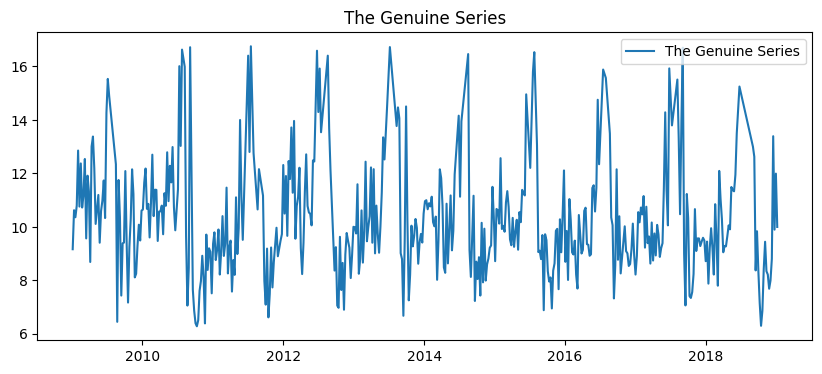

ADF Test on Original Series:
ADF Statistic: -7.601014856892266
p-value: 2.389309626533614e-11
Series is stationary

ADF Test on First Order Differencing:
ADF Statistic: -8.475794554669784
p-value: 1.436649648689559e-13
Series is stationary

ADF Test on Second Order Differencing:
ADF Statistic: -9.666673512115105
p-value: 1.3096151667015894e-16
Series is stationary


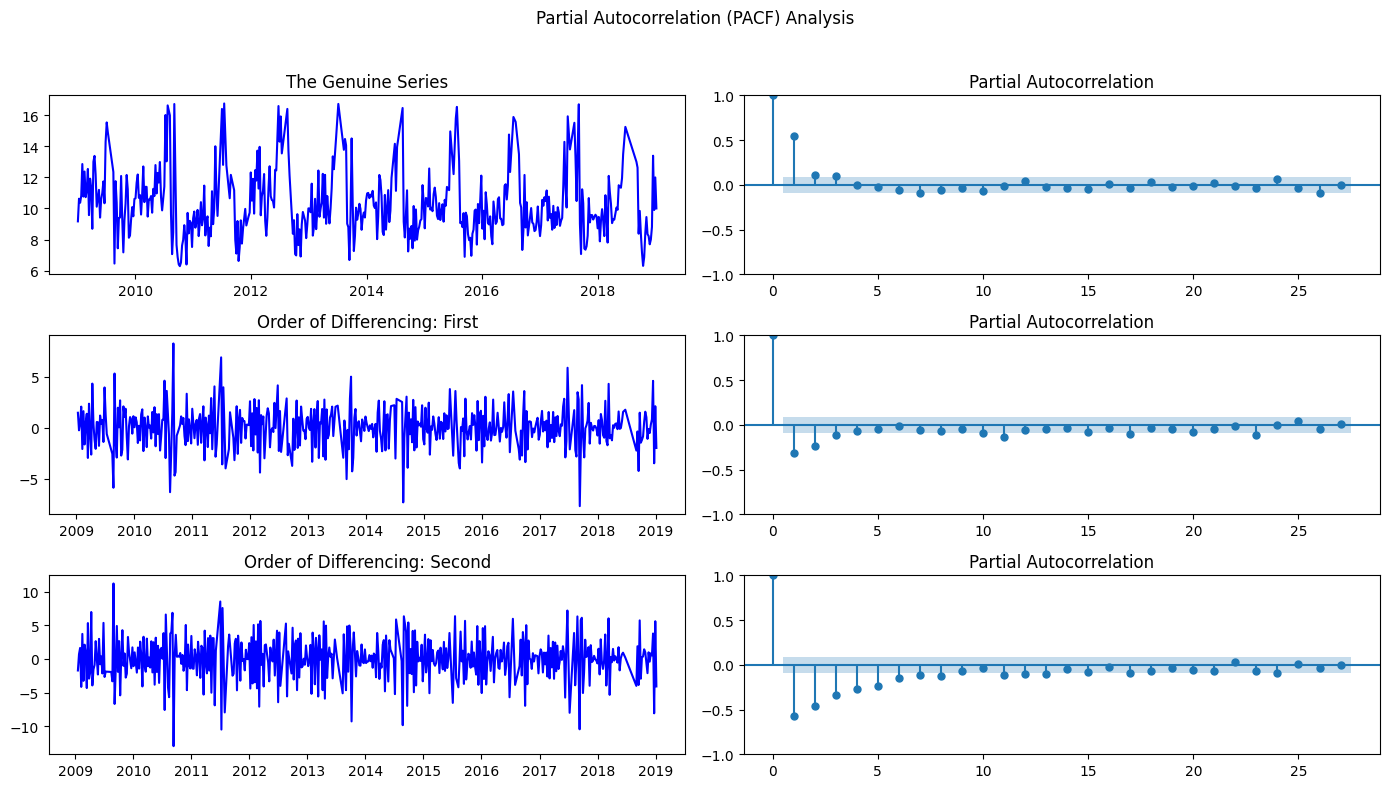

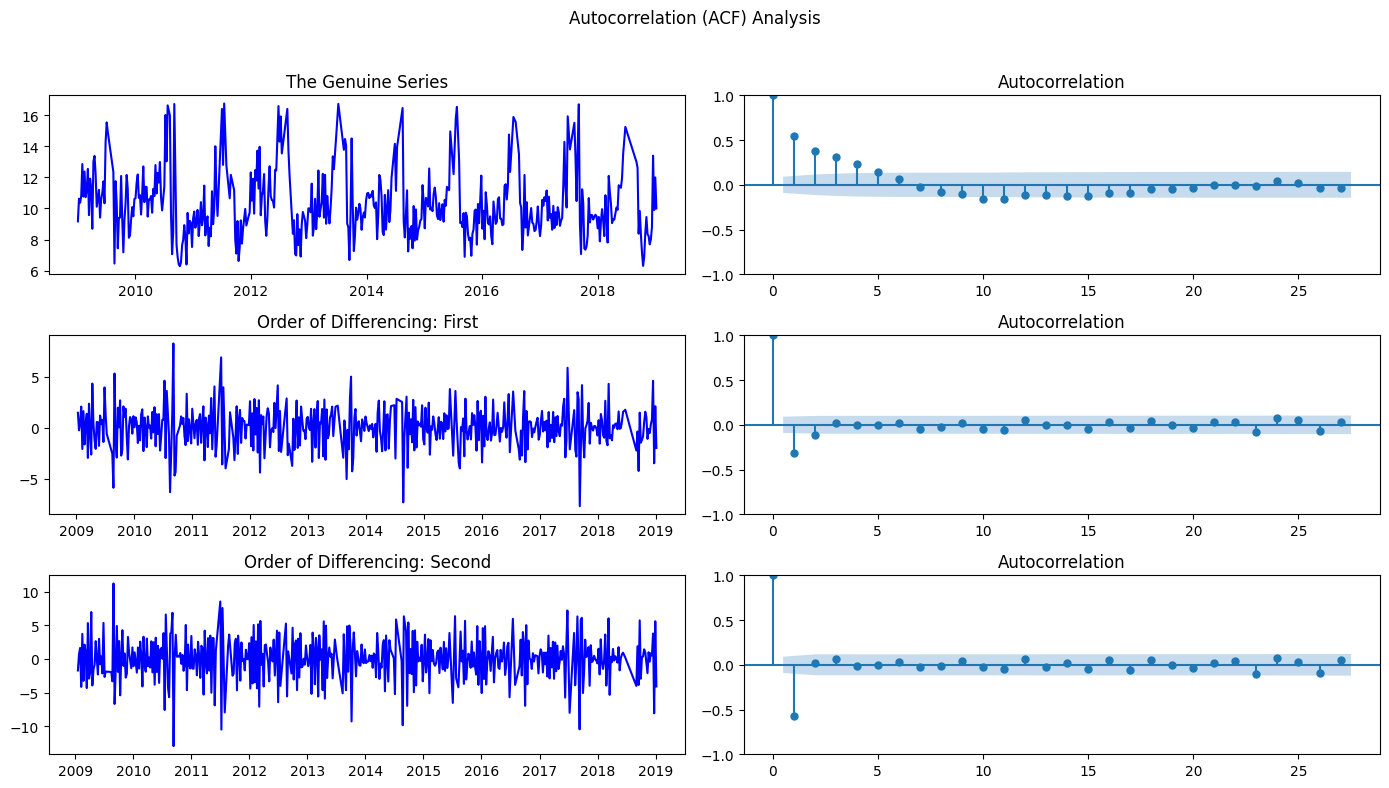

p-value: 2.389309626533614e-11
p-value: 1.436649648689559e-13
p-value: 1.3096151667015894e-16


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

# Define the date ranges for historical and comparison data
start_date_2009 = pd.to_datetime('2009-01-01')
end_date_2018 = pd.to_datetime('2018-12-31')
start_date_2019 = pd.to_datetime('2019-01-01')
end_date_2019 = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018 and 2019 separately
filtered_data_actual = filtered_data[(filtered_data.index >= start_date_2009) & (filtered_data.index <= end_date_2018)]
filtered_data_comparison = filtered_data[(filtered_data.index >= start_date_2019) & (filtered_data.index <= end_date_2019)]

# Resample to weekly data
df_weekly = filtered_data_actual.resample('W').mean()
df_weekly_comparison = filtered_data_comparison.resample('W').mean()

# Define the function to find and remove outliers based on IQR
def remove_outliers_iqr(df, numerical_columns):
    # Calculate the IQR for each numerical column
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing rows where any column value is outside the IQR range (outliers)
    df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

    return df_no_outliers

# List of numerical columns to check for outliers
numerical_columns = ['windspeedKmph']

# Remove outliers from both the filtered data sets
df_weekly_no_outliers = remove_outliers_iqr(df_weekly, numerical_columns)
df_weekly_comparison_no_outliers = remove_outliers_iqr(df_weekly_comparison, numerical_columns)

# Prepare the data series for further analysis or plotting
series = df_weekly_no_outliers['windspeedKmph']
comparison_series_2019 = df_weekly_comparison_no_outliers['windspeedKmph']

# ADF Test for checking if data is stationary
# ADF Test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

def adf_pvalue(series):
    result = adfuller(series)
    print('p-value:', result[1])

# SARIMA Plot

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(series, label='The Genuine Series')
plt.title("The Genuine Series")
plt.legend()
plt.show()

# Original Series and ADF test
print("ADF Test on Original Series:")
adf_test(series)

# First Order Differencing
first_diff = series.diff().dropna()
print("\nADF Test on First Order Differencing:")
adf_test(first_diff)

# Second Order Differencing
second_diff = first_diff.diff().dropna()
print("\nADF Test on Second Order Differencing:")
adf_test(second_diff)

# Determine the p value
# PACF to determine AR terms (p)
# Plotting Original, First Differencing, Second Differencing
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Partial Autocorrelation (PACF) Analysis")

# Plot the Genuine Series and its ACF
axes[0, 0].plot(series, color='blue')
axes[0, 0].set_title("The Genuine Series")
plot_pacf(series.dropna(), ax=axes[0, 1])

# Plot First Order Differencing and its ACF
axes[1, 0].plot(first_diff, color='blue')
axes[1, 0].set_title("Order of Differencing: First")
plot_pacf(first_diff, ax=axes[1, 1])

# Plot Second Order Differencing and its ACF
axes[2, 0].plot(second_diff, color='blue')
axes[2, 0].set_title("Order of Differencing: Second")
plot_pacf(second_diff, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Determine the q value
# ACF to determine MA terms (q)
# Plotting Original, First Differencing, Second Differencing
fig, axes = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Autocorrelation (ACF) Analysis")

# Plot the Genuine Series and its ACF
axes[0, 0].plot(series, color='blue')
axes[0, 0].set_title("The Genuine Series")
plot_acf(series.dropna(), ax=axes[0, 1])

# Plot First Order Differencing and its ACF
axes[1, 0].plot(first_diff, color='blue')
axes[1, 0].set_title("Order of Differencing: First")
plot_acf(first_diff, ax=axes[1, 1])

# Plot Second Order Differencing and its ACF
axes[2, 0].plot(second_diff, color='blue')
axes[2, 0].set_title("Order of Differencing: Second")
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Determine the d value
adf_pvalue(series)
adf_pvalue(first_diff)
adf_pvalue(second_diff)

P = 1, Q = 1, D = 1

**Finding Exogenous variable and SARIMAX model for wind speed**

Correlation with windspeedKmph:
windspeedKmph    1.000000
precipMM         0.538975
cloudcover       0.427967
humidity         0.236450
mintempC         0.185530
DewPointC        0.110624
tempC            0.021722
FeelsLikeC      -0.058078
HeatIndexC      -0.061813
uvIndex         -0.279409
maxtempC        -0.284335
sunHour         -0.438101
Name: windspeedKmph, dtype: float64


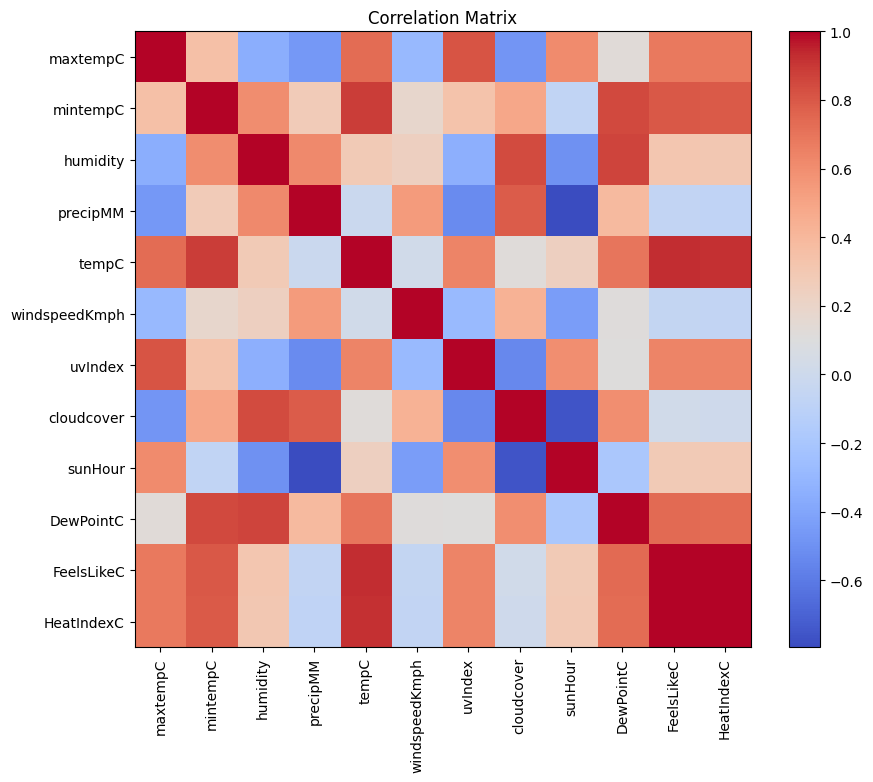

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_weekly_no_outliers.corr()

# Get the correlation of all features with 'tempC'
correlation_with_windspeedKmph = correlation_matrix['windspeedKmph'].sort_values(ascending=False)

# Display the correlation with tempC
print("Correlation with windspeedKmph:")
print(correlation_with_windspeedKmph)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Ranking Fitur Berdasarkan Skor:
       Feature       Score
3     precipMM  518.675926
7      sunHour  396.161644
6   cloudcover  388.490103
2     humidity  146.478314
5      uvIndex  140.685235
0     maxtempC  137.698899
1     mintempC   57.301955
8    DewPointC   45.333803
10  HeatIndexC    7.030544
9   FeelsLikeC    6.039072
4        tempC    0.034346


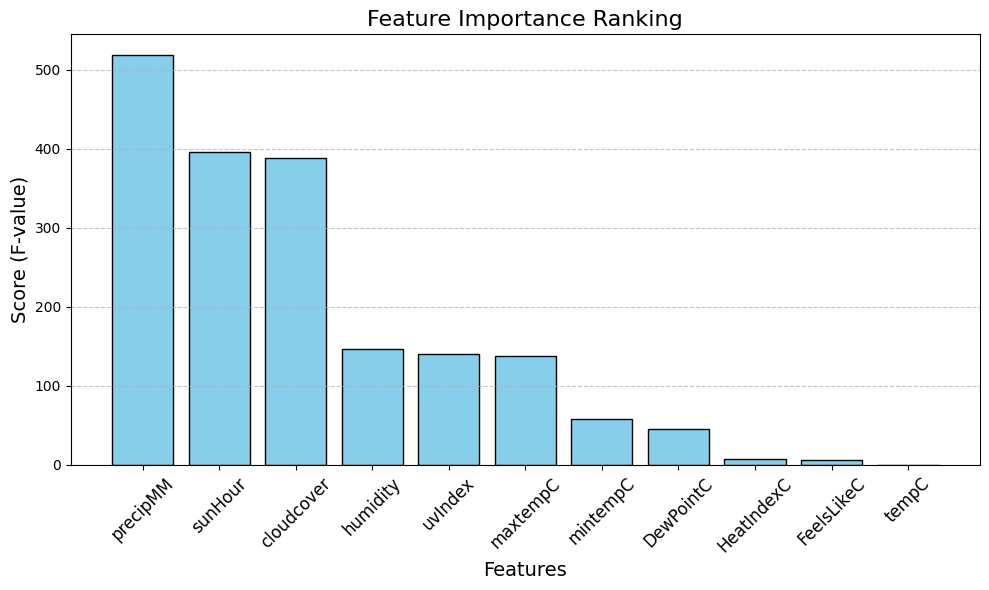

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Pisahkan target (y) dan fitur kandidat (X)
X = df_weekly.drop(columns=['windspeedKmph'])  # Semua kolom kecuali target dan yang mempunya korelasi terlalu tinggi
y = df_weekly['windspeedKmph']  # Kolom target

# Pastikan data bersih dari NaN
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Standarisasi data (untuk kestabilan model)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gunakan SelectKBest dengan F-value sebagai metode seleksi
k_best_selector = SelectKBest(score_func=f_regression, k='all')  # Pilih semua untuk melihat skor
X_new = k_best_selector.fit_transform(X_scaled, y)

# Tampilkan skor fitur
scores = k_best_selector.scores_
features = X.columns

# Gabungkan fitur dengan skor dalam bentuk DataFrame untuk analisis
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Cetak hasil
print("Ranking Fitur Berdasarkan Skor:")
print(feature_scores)

# Plot skor fitur
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue', edgecolor='black')
plt.title("Feature Importance Ranking", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Score (F-value)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the date ranges for historical and comparison data
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2019-12-31')

# Filter data for 2009-2018
filtered_data_actual = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]

# Augmenting hourly data to weekly data
df_weekly = filtered_data_actual.resample('W').mean()

# Define a function to calculate evaluation metrics
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"=== Evaluation Metrics for {model_name} ===")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("==========================================\n")

    return mae, r2

# List of numerical columns to check for outliers
numerical_columns = ['windspeedKmph']

# Remove outliers
df_weekly_no_outliers = df_weekly

# Add the additional feature 'temp_diff' to the weekly resampled data
df_weekly_no_outliers['temp_diff'] = df_weekly_no_outliers['maxtempC'] - df_weekly_no_outliers['mintempC']

# Prepare data series and exogenous variables
series = df_weekly_no_outliers['windspeedKmph']
exogenous_columns = ['cloudcover', 'humidity', 'precipMM' , 'uvIndex']
exog_data = df_weekly_no_outliers[exogenous_columns]
# SARIMA model parameters
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 52

# Fit SARIMAX model with exogenous variables
sarimax_model = SARIMAX(series, exog=exog_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarimax_model_fit = sarimax_model.fit(disp=False)
print(sarimax_model_fit.summary())

# Forecast periods and future exogenous data
new_forecast_periods = 208  # Forecast for 2 years (weekly)
forecast_dates = pd.date_range(start=df_weekly.index[-1] + pd.Timedelta(weeks=1), periods=new_forecast_periods, freq='W')

# Generate forecasts for SARIMAX
exog_forecast = exog_data.iloc[-new_forecast_periods:]  # Use future exogenous data if available
sarimax_forecast = sarimax_model_fit.get_forecast(steps=new_forecast_periods, exog=exog_forecast)
sarimax_forecast_mean = sarimax_forecast.predicted_mean
sarimax_forecast_ci = sarimax_forecast.conf_int()

actual_data = series[-new_forecast_periods:]  # Adjust to actual test data

# Evaluate SARIMAX
sarimax_mae, sarimax_r2 = evaluate_model(
    actual=actual_data,
    predicted=sarimax_forecast_mean[:len(actual_data)],
    model_name="SARIMAX"
)

                                     SARIMAX Results                                      
Dep. Variable:                      windspeedKmph   No. Observations:                  575
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1205.368
Date:                            Wed, 18 Dec 2024   AIC                           2428.736
Time:                                    08:42:08   BIC                           2467.055
Sample:                                01-04-2009   HQIC                          2443.745
                                     - 01-05-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cloudcover     0.0396      0.013      2.953      0.003       0.013       0.066
humidity      -0.0920      0.036   

Mencoba model lain untuk WindspeedKmph

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn import metrics
from IPython.display import Image, SVG
import seaborn as sns
import pydotplus
from io import StringIO
import os

# Reading the CSV file
file_path = 'mumbai.csv'
data = pd.read_csv(file_path)

# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 'windspeedKmph', 'uvIndex', 'cloudcover', 'sunHour', 'DewPointC', 'FeelsLikeC', 'HeatIndexC']]

# Convert 'date_time' to datetime format (removing timezone awareness if it exists)
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)

# Path for Graphviz (adjust if needed)
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Convert 'date_time' to datetime and set it as the index
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])
weather_data.set_index('date_time', inplace=True)

# Resample data to weekly intervals (e.g., mean for temperature, sum for precipitation)
weekly_data = weather_data.resample('W').agg({
    'maxtempC': 'mean',      # Average max temperature per week
    'mintempC': 'mean',      # Average min temperature per week
    'tempC': 'mean',         # Average temperature per week
    'humidity': 'mean',      # Average humidity per week
    'precipMM': 'sum',       # Total precipitation per week
    'windspeedKmph': 'mean',  # Average wind speed per week
    'DewPointC': 'mean',      # Average dew point temperature per week
    'HeatIndexC': 'mean',     # Average heat index per week
    'cloudcover': 'mean',    # Average cloud cover per week
    'uvIndex': 'mean',       # Average UV Index per week
    'sunHour': 'mean'        # Average sunlight hours per week
})

# Reset index to bring 'date_time' back as a column
weekly_data.reset_index(inplace=True)

# Add 'year' column for filtering
weekly_data['year'] = weekly_data['date_time'].dt.year

# Filter data for training and testing
train_data = weekly_data[weekly_data['year'].between(2009, 2018)] #80% data training
test_data = weekly_data[weekly_data['year'].between(2019, 2020)] #20% data testing

# Define features and targets as before
feature_cols = ['cloudcover', 'humidity', 'precipMM' , 'uvIndex']
X_train = train_data[feature_cols]
y_train_reg = train_data['windspeedKmph']

X_test = test_data[feature_cols]
y_test_reg = test_data['windspeedKmph']

# Filter data for the full time frame (2009–2020)
full_data = weekly_data[weekly_data['year'].between(2009, 2018)]

# Define features and targets
X_full = full_data[feature_cols]
y_full_reg = full_data['windspeedKmph']

# ---------------------
# Random Forest Regressor
# ---------------------
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train_reg)
rf_y_pred = rf_reg.predict(X_test)
rf_r2 = r2_score(y_test_reg, rf_y_pred)
print(f"Random Forest R-Squared: {rf_r2:.2f}")

# ---------------------
# XGBoost Regressor
# ---------------------
xgb_reg = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_reg.fit(X_train, y_train_reg)
xgb_y_pred = xgb_reg.predict(X_test)
xgb_r2 = r2_score(y_test_reg, xgb_y_pred)
print(f"XGBoost R-Squared: {xgb_r2:.2f}")

# ---------------------
# Decision Tree Regressor
# ---------------------
dt_reg = DecisionTreeRegressor(max_depth=8, random_state=42)
dt_reg.fit(X_train, y_train_reg)
dt_y_pred = dt_reg.predict(X_test)
dt_r2 = r2_score(y_test_reg, dt_y_pred)
print(f"Decision Tree R-Squared: {dt_r2:.2f}")

C:\Users\andre\AppData\Local\Temp\ipykernel_10256\3203648438.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)
C:\Users\andre\AppData\Local\Temp\ipykernel_10256\3203648438.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])


Random Forest R-Squared: 0.15
XGBoost R-Squared: -0.34
Decision Tree R-Squared: -0.67


Model yang kita pakai tidak cocok untuk data windspeed / Variabel yang kita pakai untuk prediksi tidak berpengaruh untuk data windspeed

**PRESENTATION AND AUTOMATION**

GUI to show the trend plot for current data (Year 2009 to 2019) and the prediction plot for forecasting years (Year 2020 to 2024)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, OptionMenu, StringVar, IntVar, Frame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Reading the CSV file
file_path = 'mumbai.csv'
data = pd.read_csv(file_path)

# Select only the relevant columns
weather_data = data[['date_time', 'maxtempC', 'mintempC', 'humidity', 'precipMM', 'tempC', 
                     'windspeedKmph', 'uvIndex', 'cloudcover', 'sunHour', 'DewPointC', 
                     'FeelsLikeC', 'HeatIndexC']]

# Convert 'date_time' to datetime format and remove timezone awareness if it exists
weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)

# Filter data within the specified date range
start_date = pd.to_datetime('2009-01-01')
end_date = pd.to_datetime('2019-12-31')
filtered_data = weather_data[(weather_data['date_time'] >= start_date) & (weather_data['date_time'] <= end_date)]

# Set 'date_time' as the index
filtered_data.set_index('date_time', inplace=True)

# Dropdown options
columns = ['tempC', 'windspeedKmph', 'humidity']
durations = ['Monthly', 'Weekly', 'Daily']
years = list(range(2009, 2025))

def plot_weather_data(column, duration, year):
    # Filter data for the selected year
    year_data = filtered_data[filtered_data.index.year == year]

    # Resample data based on duration
    if duration == "Monthly":
        resampled_data = year_data.resample('M').mean()
    elif duration == "Weekly":
        resampled_data = year_data.resample('W').mean()
    elif duration == "Daily":
        resampled_data = year_data

    # Extract max and min values for the selected column
    col_max = resampled_data[column].max()
    col_min = resampled_data[column].min()
    col_max_date = resampled_data[resampled_data[column] == col_max].index[0]
    col_min_date = resampled_data[resampled_data[column] == col_min].index[0]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(resampled_data.index, resampled_data[column], label=f'{column} Trend', color='green')
    ax.scatter(col_max_date, col_max, color='darkred', label=f'Max: {col_max:.2f} on {col_max_date.date()}', zorder=5)
    ax.scatter(col_min_date, col_min, color='blue', label=f'Min: {col_min:.2f} on {col_min_date.date()}', zorder=5)
    ax.set_title(f'{column} Analysis for {year} ({duration} Data)')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.legend()
    ax.grid(True)
    return fig

# Augmenting hourly data to weekly data
df_weekly = filtered_data.resample('W').mean()

# Function to remove outliers using IQR, excluding windspeedKmph from outlier removal
def remove_outliers_iqr(df, numerical_columns, exclude_columns=[]):
    # Remove specified columns from the outlier check
    columns_to_check = [col for col in numerical_columns if col not in exclude_columns]
    
    Q1 = df[columns_to_check].quantile(0.25)
    Q3 = df[columns_to_check].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[~((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)]
    return df_no_outliers

# List of numerical columns to check for outliers
numerical_columns = ['tempC', 'humidity']

# Remove outliers for the other columns, but not for windspeedKmph
df_weekly_no_outliers = remove_outliers_iqr(df_weekly, numerical_columns)

# Add the additional feature 'temp_diff' to the weekly resampled data
df_weekly_no_outliers['temp_diff'] = df_weekly_no_outliers['maxtempC'] - df_weekly_no_outliers['mintempC']

# Prepare data series and exogenous variables for SARIMAX
exogenous_columns = ['uvIndex', 'humidity', 'cloudcover', 'DewPointC', 'windspeedKmph', 'sunHour', 'temp_diff', 'precipMM']
exog_data = df_weekly_no_outliers[exogenous_columns]

# Define a function to train SARIMAX models for each target
def train_sarimax_model(target, exogenous_columns, order, seasonal_order):
    exog_data = df_weekly_no_outliers[exogenous_columns]
    model = SARIMAX(df_weekly_no_outliers[target], exog=exog_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    return model_fit

# SARIMA model parameters
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 52

# Define the correct exogenous variables for each target
exog_columns_tempC = ['uvIndex', 'humidity', 'cloudcover', 'DewPointC', 'windspeedKmph', 'sunHour', 'temp_diff', 'precipMM']
exog_columns_humidity = ['uvIndex', 'DewPointC', 'cloudcover']

# Train models for each target
sarimax_models = {
    'tempC': train_sarimax_model('tempC', exog_columns_tempC, (p, d, q), (P, D, Q, S)),
    'humidity': train_sarimax_model('humidity', exog_columns_humidity, (p, d, q), (P, D, Q, S))
}

# Function to forecast using the trained models and assign a DatetimeIndex
def forecast_sarimax(model_fit, exog_columns=None, steps=260, start_date='2020-01-01', freq='W'):
    if exog_columns:
        exog_forecast = df_weekly_no_outliers[exog_columns].iloc[-steps:]  # Use future exogenous data if available
        forecast = model_fit.get_forecast(steps=steps, exog=exog_forecast)
    else:
        forecast = model_fit.get_forecast(steps=steps)

    # Assign a DatetimeIndex to forecast results
    forecast_dates = pd.date_range(start=start_date, periods=steps, freq=freq)
    predicted_mean = pd.Series(forecast.predicted_mean.values, index=forecast_dates)
    conf_int = pd.DataFrame(forecast.conf_int().values, index=forecast_dates, columns=forecast.conf_int().columns)
    
    return predicted_mean, conf_int

# Function to cap humidity predictions between 0 and 100
def cap_humidity(predicted_mean, conf_int):
    capped_mean = predicted_mean.clip(lower=0, upper=100)
    capped_conf_int = conf_int.clip(lower=0, upper=100)
    return capped_mean, capped_conf_int

# Modify SARIMAX forecasts to include capping for humidity
sarimax_forecasts = {
    target: cap_humidity(*forecast_sarimax(
        sarimax_models[target], 
        exog_columns=exog_columns_tempC if target == 'tempC'
        else exog_columns_humidity
    ))
    for target in ['tempC', 'humidity']
}

# Function to plot forecast
def plot_sarimax_forecast(column, duration, year):
    plt.clf()  # Clear the current figure
    plt.close()  # Close the current figure

    # Determine data and forecast dates based on duration
    if duration == 'Weekly':
        data = df_weekly_no_outliers
        forecast_mean, forecast_ci = sarimax_forecasts[column]
        forecast_dates_resampled = forecast_mean.index  # Use the index directly
    elif duration == 'Monthly':
        data = df_weekly_no_outliers.resample('M').mean()
        forecast_mean, forecast_ci = sarimax_forecasts[column]
        # Resample forecasts to monthly frequency
        forecast_mean_resampled = forecast_mean.resample('M').mean()
        forecast_ci_resampled = forecast_ci.resample('M').mean()
        forecast_dates_resampled = forecast_mean_resampled.index  # Use resampled index

    # Define the start and end dates for the year
    year_start_date = pd.to_datetime(f'{year}-01-01')
    year_end_date = pd.to_datetime(f'{year}-12-31')

    # Filter data for the specified year
    forecast_mean_filtered = forecast_mean_resampled[
        (forecast_mean_resampled.index >= year_start_date) & (forecast_mean_resampled.index <= year_end_date)
    ] if duration == 'Monthly' else forecast_mean[
        (forecast_mean.index >= year_start_date) & (forecast_mean.index <= year_end_date)
    ]

    forecast_ci_filtered = forecast_ci_resampled[
        (forecast_ci_resampled.index >= year_start_date) & (forecast_ci_resampled.index <= year_end_date)
    ] if duration == 'Monthly' else forecast_ci[
        (forecast_ci.index >= year_start_date) & (forecast_ci.index <= year_end_date)
    ]

    forecast_dates_filtered = forecast_mean_filtered.index  # Use the filtered index

    # Find max and min values and their corresponding dates
    max_value = forecast_mean_filtered.max()
    max_date = forecast_mean_filtered.idxmax()
    min_value = forecast_mean_filtered.min()
    min_date = forecast_mean_filtered.idxmin()

    # Plot the forecasts
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(
        forecast_dates_filtered, 
        forecast_mean_filtered, 
        color='green', linestyle='--', label=f"SARIMAX Forecast ({year})"
    )
    ax.fill_between(
        forecast_dates_filtered, 
        forecast_ci_filtered.iloc[:, 0], 
        forecast_ci_filtered.iloc[:, 1], 
        color='green', alpha=0.2
    )

    # Plot max and min values as scatter points
    ax.scatter(max_date, max_value, color='red', label=f'Max: {max_value:.2f} on {max_date.date()}', zorder=5)
    ax.scatter(min_date, min_value, color='blue', label=f'Min: {min_value:.2f} on {min_date.date()}', zorder=5)

    # Configure plot labels and legend
    ax.set_title(f"SARIMAX Forecast for {column} - {year} ({duration})")
    ax.set_xlabel("Date")
    ax.set_ylabel(column)
    ax.legend()
    ax.grid(True)

    return fig

def on_plot_trend():
    column = column_var.get()
    duration = duration_var.get()
    year = year_var.get()
    fig = plot_weather_data(column, duration, year)
    
    # Clear the previous plot
    for widget in plot_frame.winfo_children():
        widget.destroy()
    
    # Embed the new plot in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

def on_plot_prediksi():
    column = column_var.get()
    duration = duration_var.get()
    year = year_var.get()
    fig = plot_sarimax_forecast(column, duration, year)
    
    # Clear the previous plot
    for widget in plot_frame.winfo_children():
        widget.destroy()
    
    # Embed the new plot in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Create the main window
root = Tk()
root.title("Weather Data Plotter")

# Create and set the message text variable
column_var = StringVar(root)
column_var.set(columns[0])  # default value

duration_var = StringVar(root)
duration_var.set(durations[0])  # default value

year_var = IntVar(root)
year_var.set(years[0])  # default value

# Create and pack the widgets
Label(root, text="Select Column:").pack()
OptionMenu(root, column_var, *columns).pack()

Label(root, text="Select Duration:").pack()
OptionMenu(root, duration_var, *durations).pack()

Label(root, text="Select Year:").pack()
OptionMenu(root, year_var, *years).pack()

Button(root, text="Plot Trend", command=on_plot_trend).pack()
Button(root, text="Plot Prediksi", command=on_plot_prediksi).pack()

# Create a frame to hold the plot
plot_frame = Frame(root)
plot_frame.pack()

# Run the main loop
root.mainloop()


C:\Users\andre\AppData\Local\Temp\ipykernel_10256\3128296246.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['date_time'] = pd.to_datetime(weather_data['date_time'], utc=True).dt.tz_localize(None)
C:\Users\andre\AppData\Local\Temp\ipykernel_10256\3128296246.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekly_no_outliers['temp_diff'] = df_weekly_no_outliers['maxtempC'] - df_weekly_no_outliers['mintempC']
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sta